In [2]:
import os
import mne
import numpy as np
import pandas as pd
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, permutation_test
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

# Fetch Data

In [3]:
main_path = './Dataset'

In [4]:
sbj_records = []
for sub in os.listdir(main_path):
    tmp = []
    for file in os.listdir(f'./Dataset/{sub}'):
        if file.split(sep='.')[1] == 'dat':
            tmp.append(mne.io.read_raw(f'./Dataset/{sub}/{file}', preload=True))
    sbj_records.append(mne.concatenate_raws(tmp))
        

Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 981199  =      0.000 ...   981.199 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject1\motor1.ceo...
Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 984999  =      0.000 ...   984.999 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject1\motor2.ceo...
Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 1022899  =      0.000 ...  1022.899 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject1\motor3.ceo...
Leaving device<->head transform as None (no landmarks found)
Reading 0 ... 2031599  =      0.000 ...  2031.599 secs...
Event file found. Extracting Annotations from C:\Users\DFMRendering\Desktop\python\in-ear\Dataset\subject2\motor.ceo...
Leaving device<->head transform as None (no

**resample data to 250 Hz**

In [5]:
for data in sbj_records:
    data.resample(250)

**using bandpass filter 4 - 38 Hz**

In [6]:
for data in sbj_records:
    data.filter(l_freq=4, h_freq=38, method='fir')

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


**Create epochs**

In [7]:
epochs = []
reject_criteria = dict(eeg=800e-6)

for sbj in sbj_records:
    events, event_id = mne.events_from_annotations(sbj)
    epoch = mne.Epochs(sbj, tmin=-1, tmax=2, events=events, event_id=event_id, 
                           detrend=1, event_repeated='merge', reject=reject_criteria, preload=True)
    epochs.append(epoch)


Used Annotations descriptions: ['1', '2', '700010']
Not setting metadata
242 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 242 events and 751 original time points ...
    Rejecting  epoch based on EEG : ['T9', 'FT9', 'FTT9h', 'T7', 'TP7', 'TTP7h', 'C5', 'FTT7h', 'Ft7', 'FFT7h', 'FC5', 'FCC5h', 'CCP5h', 'TPP5h', 'P7', 'P9', 'P11', 'PO11', 'PO9', 'PPO7', 'P5', 'CPP5h', 'CP3', 'C3', 'FC3', 'FFC5h', 'F5', 'F7', 'AF7', 'AFF5h', 'F3', 'FFC3h', 'FCC3h', 'C1', 'CCP3h', 'CPP3h', 'P3', 'PO3', 'POO7', 'POO9h', 'POO11h', 'I1', 'OI1', 'POO3', 'PO1', 'PPO1', 'CPP1h', 'CP1', 'CCP1h', 'FCC1h', 'FC1', 'FFC1h', 'F1', 'AF3', 'FP1', 'FPz', 'AFz', 'Fz', 'FCz', 'FCCz', 'Cz', 'CPPz', 'PPOz', 'POz', 'POOz', 'Oz', 'Iz', 'I2', 'OI2', 'POO4', 'PO2', 'PPO2', 'CPP2h', 'CP2', 'CCP2h', 'FCC2h', 'FC2', 'FFC2h', 'F2', 'AF4', 'Fp2', 'AF8', 'AFF6h', 'F4', 'FFC4h', 'FCC4h', 'C2', 'CCP4h', 'CPP4h', '

In [8]:
epochs

[<Epochs |  240 events (all good), -1 – 2 s, baseline -1 – 0 s, ~181.7 MB, data loaded,
  '1': 120
  '2': 120
  '700010': 0>,
 <Epochs |  160 events (all good), -1 – 2 s, baseline -1 – 0 s, ~121.2 MB, data loaded,
  '1': 80
  '2': 80>,
 <Epochs |  157 events (all good), -1 – 2 s, baseline -1 – 0 s, ~118.9 MB, data loaded,
  '1': 78
  '2': 78
  '800000/800001': 1>,
 <Epochs |  53 events (all good), -1 – 2 s, baseline -1 – 0 s, ~40.3 MB, data loaded,
  '1': 26
  '2': 27
  '800000/800001': 0>,
 <Epochs |  234 events (all good), -1 – 2 s, baseline -1 – 0 s, ~177.1 MB, data loaded,
  '1': 117
  '2': 117
  '800000/800001': 0>,
 <Epochs |  240 events (all good), -1 – 2 s, baseline -1 – 0 s, ~181.7 MB, data loaded,
  '1': 120
  '2': 120>]

**electrode wise standardization**

In [9]:
data_subjects = []
for sbj in epochs:
    data_subjects.append(sbj.get_data())

C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\2247543470.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_subjects.append(sbj.get_data())
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\2247543470.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_subjects.append(sbj.get_data())
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\2247543470.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_subjects.append(sbj.get_data())
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\2247543470.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data_subjects.append(sbj.get_data())
C:\U

In [10]:
for data in data_subjects:
    for i in range(data.shape[0]):
        mean = np.mean(data[i, :])
        std = np.std(data[i, :])
        data[i, :] = (data[i, :] - mean) / std

In [11]:
for i in range(len(sbj_records)):
    sbj_records[i]._data = data_subjects[i]

In [12]:
for sbj in sbj_records:
    # Set the misc channels to EEG type
    sbj.set_channel_types({
        'RF': 'eeg', 'RB': 'eeg', 'ROD': 'eeg',
        'LF': 'eeg', 'LB': 'eeg', 'LOD': 'eeg'
    })

**There is a miss classification for sample 108, it has been labeled 5 but we just have two classes**</br>so we decided to delete it

In [13]:
np.where(epochs[2].events[..., -1] == 5)

(array([108], dtype=int64),)

In [14]:
epochs[2].drop(108)

Dropped 1 epoch: 108


Number of events,156
Events,1: 782: 78800000/800001: 0
Time range,-1.000 – 2.000 s
Baseline,-1.000 – 0.000 s


In [15]:
np.where(epochs[2].events[..., -1] == 5)

(array([], dtype=int64),)

**Re-refferencing to difference locations**

In [16]:
for sbj in epochs:
    for ch in ['LF', 'LB', 'LOD', 'LOU', 'RF', 'RB', 'ROD', 'ROU']:
        sbj.set_channel_types({ch: 'eeg'})

In [17]:
re_referenced = {
    'scalp_REF': [],
    'ear_REF': [],
    'ear_IPSI': [],
    'ear_CONTRA': [],
    'ear_EEG': []
}
scalp_channels = ["Fp2", "F7", "F3", "Fz", "F4", "F8", "FC5", "FC1", "FC2", "FC6", "T7", "C3", "Cz", "C4", "T8", "CP1", "CP2", "P7", "P3", "P4", "P8", "Oz"]
ear_channels = ['RF', 'RB', 'ROD', 'ROU', 'LF', 'LB', 'LOD', 'LOU']
for sbj in epochs:
    # Reference scalp_REF
    sbj_ref = sbj.copy().set_eeg_reference(scalp_channels)
    re_referenced['scalp_REF'].append(sbj_ref)

    # Reference ear_REF
    ear_REF = sbj.copy()
    picks = mne.pick_channels(sbj.copy().info['ch_names'], scalp_channels + ear_channels)
    rereferenced_data, _ = mne.set_eeg_reference(sbj.copy().pick_channels(scalp_channels + ear_channels), ref_channels=scalp_channels)
    ear_REF._data[:, picks, :] = rereferenced_data._data
    re_referenced['ear_REF'].append(ear_REF)

    # Reference ear_IPSI
    
    # left
    sbj_left = sbj.copy()
    picks_left = mne.pick_channels(sbj.copy().info['ch_names'], ['LF', 'LB', 'LOD', 'LOU'])
    rereferenced_data, _ = mne.set_eeg_reference(sbj.copy().pick_channels(['LF', 'LB', 'LOD', 'LOU']), ref_channels=['LOU'])
    sbj_left._data[:, picks_left, :] = rereferenced_data._data
    
    # right
    sbj_right = sbj.copy()
    picks_right = mne.pick_channels(sbj.copy().info['ch_names'], ['RF', 'RB', 'ROD', 'ROU'])
    rereferenced_data, _ = mne.set_eeg_reference(sbj.copy().pick_channels(['RF', 'RB', 'ROD', 'ROU']), ref_channels=['ROU'])
    sbj_right._data[:, picks_right, :] = rereferenced_data._data
    
    # concatinate
    combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])
    re_referenced['ear_IPSI'].append(combined_raw_ipsi)

    # Reference ear_CONTRA
    
    # left
    sbj_left_contra = sbj.copy()
    picks_left = mne.pick_channels(sbj.copy().info['ch_names'], ['LF', 'LB', 'LOD', 'LOU', 'ROU'])
    rereferenced_data, _ = mne.set_eeg_reference(sbj.copy().pick_channels(['LF', 'LB', 'LOD', 'LOU', 'ROU']), ref_channels=['ROU'])
    sbj_left_contra._data[:, picks_left, :] = rereferenced_data._data

    # right
    sbj_right_contra = sbj.copy()
    picks_right = mne.pick_channels(sbj.copy().info['ch_names'], ['RF', 'RB', 'ROD', 'ROU', 'LOU'])
    rereferenced_data, _ = mne.set_eeg_reference(sbj.copy().pick_channels(['RF', 'RB', 'ROD', 'ROU', 'LOU']), ref_channels=['LOU'])
    sbj_right_contra._data[:, picks_right, :] = rereferenced_data._data

    # concatinate
    combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])
    re_referenced['ear_CONTRA'].append(combined_raw_contra)

    # Reference ear_EEG
    sbj_ear_eeg = sbj.copy()
    picks = mne.pick_channels(sbj.copy().info['ch_names'], (['T9', 'T10'] + scalp_channels))
    rereferenced_data, _ = mne.set_eeg_reference(sbj.copy().pick_channels(['T9', 'T10'] + scalp_channels), ref_channels=scalp_channels)
    sbj_ear_eeg._data[:, picks, :] = rereferenced_data._data
    re_referenced['ear_EEG'].append(sbj_ear_eeg)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:37: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:55: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
320 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:37: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
320 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:55: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
312 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:37: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
312 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:55: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_ch

C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:37: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:55: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
468 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:37: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
468 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:55: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:37: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_ipsi = mne.concatenate_epochs([sbj_left, sbj_right])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Not setting metadata
480 matching events found
Applying baseline correction (mode: mean)


C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\582232867.py:55: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  combined_raw_contra = mne.concatenate_epochs([sbj_left_contra, sbj_right_contra])


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


**Reshape data for EEGNet**

In [18]:
labels = {
    'scalp_REF': [],
    'ear_REF': [],
    'ear_IPSI': [],
    'ear_CONTRA': [],
    'ear_EEG': []
}
for key in re_referenced.keys():
    for subject in range(6):
        sample, channels, time_points = re_referenced[key][subject].get_data().shape
        labels[key].append(re_referenced[key][subject].events[..., -1])
        # reshape x data
        re_referenced[key][subject] = re_referenced[key][subject].get_data().reshape(sample, channels, time_points, 1)

C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\1712127357.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  sample, channels, time_points = re_referenced[key][subject].get_data().shape
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\1712127357.py:13: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  re_referenced[key][subject] = re_referenced[key][subject].get_data().reshape(sample, channels, time_points, 1)
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\1712127357.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  sample, channels, time_points = re_referenced[key][subject].get_data().shape
C:\Users\DFMRendering\AppData\Local\Temp\ipykernel_2108\1712127357.py:13: FutureWarning: The cur

# Model

In [19]:
def create_model(inp_shape):
    input_shape = inp_shape
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(25, (1, 10), padding='valid', activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
        tf.keras.layers.DepthwiseConv2D((input_shape[0], 1), depth_multiplier=2, kernel_regularizer=tf.keras.regularizers.l2(), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((1, 3)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.SeparableConv2D(2*25, (1, 10), activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((1, 3)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

**create and save result**

In [ ]:
result = {
        'within_subject': {'scalp_REF': [],'ear_REF': [],'ear_IPSI': [],'ear_CONTRA': [],'ear_EEG': []},
        'cross_subject': {'scalp_REF': [],'ear_REF': [],'ear_IPSI': [],'ear_CONTRA': [],'ear_EEG': []},
        'individual_subject': {'scalp_REF': [],'ear_REF': [],'ear_IPSI': [],'ear_CONTRA': [],'ear_EEG': []}
    }

**Within-subject classification**

In [20]:
kf = KFold(5)

for key in re_referenced.keys():
    print(f"Method {key}:")
    for subject in range(6):
        x = re_referenced[key][subject]
        y = OneHotEncoder().fit_transform(labels[key][subject].reshape(-1, 1)).toarray()
        fold_accuracies = []
        print(f"\nSubject {subject + 1}:")
        for fold, (train_idx, test_idx) in enumerate(kf.split(x)):
            print(f"  Fold {fold + 1}:")
            # Split the data into training and testing sets
            x_train, x_test = x[train_idx], x[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Create a new model for each fold to prevent data leakage
            model = create_model(x_train.shape[1:])

            # set Callbacks
            # callback = tf.keras.callbacks.EarlyStopping(monitor='loss')
            
            # Train the model on the training set
            model.fit(x_train, y_train, epochs=150)
            
            # Test the model on the test set
            y_pred = model.predict(x_test)
            accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
            fold_accuracies.append(accuracy)
            
            print(f"Accuracy: {accuracy:.4f}")
        
        # Calculate and print the average accuracy for this subject
        avg_accuracy = np.mean(fold_accuracies)
        result['within_subject'][key].append(avg_accuracy)
        print(f"  Average accuracy for Subject {subject + 1}: {avg_accuracy:.4f}")

Method scalp_REF:

Subject 1:
  Fold 1:
Epoch 1/150


C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 3s 32ms/step - loss: 1.1727 - accuracy: 0.4427
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 1.0226 - accuracy: 0.4740
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8611 - accuracy: 0.5469
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8132 - accuracy: 0.4583
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7192 - accuracy: 0.4948
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7363 - accuracy: 0.3958
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7202 - accuracy: 0.4531
Epoch 8/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7143 - accuracy: 0.4635
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7132 - accuracy: 0.4740
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7023 - accuracy: 0.5417
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.1106 - accuracy: 0.5156
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.9834 - accuracy: 0.4688
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7839 - accuracy: 0.5469
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7928 - accuracy: 0.4583
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7211 - accuracy: 0.5208
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7233 - accuracy: 0.5312
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7371 - accuracy: 0.4688
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7175 - accuracy: 0.4792
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7109 - accuracy: 0.5208
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7120 - accuracy: 0.5260
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8452 - accuracy: 0.5052
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8027 - accuracy: 0.5000
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7641 - accuracy: 0.4792
Epoch 4/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7435 - accuracy: 0.4479
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7297 - accuracy: 0.4948
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7188 - accuracy: 0.5312
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7181 - accuracy: 0.4531
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7148 - accuracy: 0.5417
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7194 - accuracy: 0.4948
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7133 - accuracy: 0.4948
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8389 - accuracy: 0.4635
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7552 - accuracy: 0.4375
Epoch 3/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7242 - accuracy: 0.4844
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7186 - accuracy: 0.4688
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7105 - accuracy: 0.5208
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7176 - accuracy: 0.4688
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7086 - accuracy: 0.5052
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7064 - accuracy: 0.5156
Epoch 9/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7082 - accuracy: 0.5208
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7081 - accuracy: 0.5469
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8780 - accuracy: 0.5260
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8748 - accuracy: 0.5000
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7645 - accuracy: 0.4792
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7392 - accuracy: 0.4948
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7250 - accuracy: 0.4896
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7101 - accuracy: 0.5312
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7183 - accuracy: 0.5312
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7046 - accuracy: 0.5312
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7217 - accuracy: 0.5208
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7130 - accuracy: 0.5208
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.9178 - accuracy: 0.4531
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7502 - accuracy: 0.4375
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7249 - accuracy: 0.5391
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7119 - accuracy: 0.4844
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7281 - accuracy: 0.4844
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7244 - accuracy: 0.5469
Epoch 7/150
4/4 [==============================] - 0s 32ms/step - loss: 0.7168 - accuracy: 0.5234
Epoch 8/150
4/4 [==============================] - 0s 32ms/step - loss: 0.7195 - accuracy: 0.4688
Epoch 9/150
4/4 [==============================] - 0s 32ms/step - loss: 0.7063 - accuracy: 0.4688
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7118 - accuracy: 0.5469
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.9041 - accuracy: 0.4766
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8023 - accuracy: 0.5312
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7492 - accuracy: 0.4844
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7211 - accuracy: 0.4375
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7162 - accuracy: 0.4922
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7203 - accuracy: 0.5391
Epoch 7/150
4/4 [==============================] - 0s 32ms/step - loss: 0.6984 - accuracy: 0.5312
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6967 - accuracy: 0.5625
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7145 - accuracy: 0.4688
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7114 - accuracy: 0.4844
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 0.7619 - accuracy: 0.4609
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7243 - accuracy: 0.4609
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7132 - accuracy: 0.5312
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7081 - accuracy: 0.5312
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7212 - accuracy: 0.4844
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7119 - accuracy: 0.5234
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7211 - accuracy: 0.4609
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7136 - accuracy: 0.4453
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7054 - accuracy: 0.5703
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7078 - accuracy: 0.5391
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7851 - accuracy: 0.4922
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7834 - accuracy: 0.4219
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7372 - accuracy: 0.5312
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7196 - accuracy: 0.4766
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6982 - accuracy: 0.5625
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7090 - accuracy: 0.5078
Epoch 7/150
4/4 [==============================] - 0s 32ms/step - loss: 0.7047 - accuracy: 0.5234
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7074 - accuracy: 0.5000
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7175 - accuracy: 0.4688
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7170 - accuracy: 0.5000
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7230 - accuracy: 0.5312
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7440 - accuracy: 0.5156
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7116 - accuracy: 0.5078
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7250 - accuracy: 0.4531
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7012 - accuracy: 0.5312
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7144 - accuracy: 0.4609
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7095 - accuracy: 0.5000
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7075 - accuracy: 0.5156
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6996 - accuracy: 0.5391
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7061 - accuracy: 0.4375
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 44ms/step - loss: 0.9057 - accuracy: 0.5565
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9228 - accuracy: 0.5565
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9957 - accuracy: 0.4194
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9138 - accuracy: 0.5161
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7459 - accuracy: 0.5726
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8173 - accuracy: 0.5726
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8302 - accuracy: 0.5161
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8054 - accuracy: 0.5887
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7886 - accuracy: 0.5242
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7963 - accuracy: 0.5000
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 42ms/step - loss: 1.1945 - accuracy: 0.4400
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 1.0670 - accuracy: 0.5360
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8731 - accuracy: 0.5040
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8047 - accuracy: 0.4960
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7467 - accuracy: 0.5040
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7278 - accuracy: 0.5440
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7243 - accuracy: 0.5680
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7169 - accuracy: 0.5120
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6921 - accuracy: 0.5520
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.6782 - accuracy: 0.5840
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 0.9660 - accuracy: 0.4560
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8342 - accuracy: 0.5280
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8081 - accuracy: 0.5040
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7641 - accuracy: 0.5040
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7994 - accuracy: 0.4240
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7290 - accuracy: 0.5200
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7386 - accuracy: 0.4720
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7346 - accuracy: 0.4880
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7206 - accuracy: 0.5200
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7309 - accuracy: 0.5520
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.8672 - accuracy: 0.4960
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.9894 - accuracy: 0.4720
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8004 - accuracy: 0.4960
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8167 - accuracy: 0.4960
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7716 - accuracy: 0.5120
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7375 - accuracy: 0.4720
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7275 - accuracy: 0.5040
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7351 - accuracy: 0.4480
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7089 - accuracy: 0.5520
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7072 - accuracy: 0.5280
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.1788 - accuracy: 0.5200
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 1.1132 - accuracy: 0.5440
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9369 - accuracy: 0.5600
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8505 - accuracy: 0.5120
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8143 - accuracy: 0.5840
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7930 - accuracy: 0.5280
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7613 - accuracy: 0.5200
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7061 - accuracy: 0.5520
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7062 - accuracy: 0.5360
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7341 - accuracy: 0.5200
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 32ms/step - loss: 0.7394 - accuracy: 0.3571
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7249 - accuracy: 0.5238
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7187 - accuracy: 0.5476
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7092 - accuracy: 0.5476
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6976 - accuracy: 0.5714
Epoch 6/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7065 - accuracy: 0.5476
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6994 - accuracy: 0.5714
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7032 - accuracy: 0.5238
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6715 - accuracy: 0.5714
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6837 - accuracy: 0.6429
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7049 - accuracy: 0.5952
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7126 - accuracy: 0.5238
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6974 - accuracy: 0.6429
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7238 - accuracy: 0.4286
Epoch 5/150
2/2 [==============================] - 0s 13ms/step - loss: 0.6980 - accuracy: 0.5476
Epoch 6/150
2/2 [==============================] - 0s 13ms/step - loss: 0.6976 - accuracy: 0.5714
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6858 - accuracy: 0.5952
Epoch 8/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6969 - accuracy: 0.5238
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6929 - accuracy: 0.6190
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6779 - accuracy: 0.6429
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7270 - accuracy: 0.4048
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7086 - accuracy: 0.5238
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7017 - accuracy: 0.5952
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7066 - accuracy: 0.6190
Epoch 5/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7205 - accuracy: 0.4762
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6729 - accuracy: 0.6667
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7042 - accuracy: 0.5238
Epoch 9/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6791 - accuracy: 0.5952
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6859 - accuracy: 0.5714
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 25ms/step - loss: 0.7255 - accuracy: 0.4884
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7211 - accuracy: 0.4651
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7298 - accuracy: 0.5581
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7144 - accuracy: 0.5814
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7279 - accuracy: 0.5349
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7040 - accuracy: 0.6047
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7063 - accuracy: 0.5349
Epoch 8/150
2/2 [==============================] - 0s 16ms/step - loss: 0.7056 - accuracy: 0.6047
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6955 - accuracy: 0.6047
Epoch 10/150
2/2 [==============================] - 0s 16ms/step - loss: 0.6992 - accuracy: 0.4651
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 16ms/step - loss: 0.8046 - accuracy: 0.3953
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7276 - accuracy: 0.5116
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7147 - accuracy: 0.4884
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7077 - accuracy: 0.6047
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7210 - accuracy: 0.5116
Epoch 6/150
2/2 [==============================] - 0s 16ms/step - loss: 0.7028 - accuracy: 0.4884
Epoch 7/150
2/2 [==============================] - 0s 16ms/step - loss: 0.6950 - accuracy: 0.5814
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6843 - accuracy: 0.6047
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6802 - accuracy: 0.6047
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7138 - accuracy: 0.4419
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 38ms/step - loss: 1.3168 - accuracy: 0.4920
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 1.1607 - accuracy: 0.5134
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9123 - accuracy: 0.5348
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 1.0278 - accuracy: 0.5241
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8989 - accuracy: 0.4973
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9264 - accuracy: 0.4439
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8334 - accuracy: 0.4706
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7389 - accuracy: 0.5401
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7407 - accuracy: 0.4813
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7456 - accuracy: 0.5027
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.0195 - accuracy: 0.4599
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8580 - accuracy: 0.5561
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7392 - accuracy: 0.4973
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7548 - accuracy: 0.4545
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7262 - accuracy: 0.5027
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7270 - accuracy: 0.4492
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7221 - accuracy: 0.4813
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7158 - accuracy: 0.4706
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7133 - accuracy: 0.4973
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7129 - accuracy: 0.4920
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 0.9459 - accuracy: 0.5134
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8521 - accuracy: 0.5080
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7726 - accuracy: 0.5187
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7352 - accuracy: 0.5134
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7246 - accuracy: 0.4866
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7333 - accuracy: 0.4920
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7215 - accuracy: 0.4759
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7279 - accuracy: 0.4599
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7160 - accuracy: 0.5080
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7089 - accuracy: 0.4973
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.2121 - accuracy: 0.5134
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 1.4213 - accuracy: 0.4813
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9870 - accuracy: 0.5401
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.9791 - accuracy: 0.4973
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9085 - accuracy: 0.5027
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7784 - accuracy: 0.4652
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7490 - accuracy: 0.4920
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8027 - accuracy: 0.4599
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7334 - accuracy: 0.4920
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7323 - accuracy: 0.4385
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 1.0063 - accuracy: 0.5213
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9494 - accuracy: 0.4574
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8418 - accuracy: 0.5585
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8588 - accuracy: 0.4096
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7764 - accuracy: 0.4681
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7491 - accuracy: 0.4840
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7228 - accuracy: 0.5000
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7355 - accuracy: 0.4894
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7067 - accuracy: 0.5426
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7086 - accuracy: 0.5213
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7310 - accuracy: 0.4479
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7226 - accuracy: 0.5156
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7102 - accuracy: 0.4688
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7111 - accuracy: 0.4635
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7107 - accuracy: 0.4427
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7078 - accuracy: 0.5052
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6954 - accuracy: 0.5833
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7006 - accuracy: 0.5469
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6983 - accuracy: 0.5469
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6977 - accuracy: 0.5521
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7649 - accuracy: 0.4948
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7075 - accuracy: 0.5417
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7207 - accuracy: 0.4531
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7107 - accuracy: 0.5156
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7071 - accuracy: 0.5156
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7059 - accuracy: 0.5052
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7055 - accuracy: 0.4896
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7076 - accuracy: 0.4844
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7057 - accuracy: 0.4792
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7060 - accuracy: 0.4688
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7635 - accuracy: 0.4427
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7242 - accuracy: 0.4583
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7157 - accuracy: 0.5052
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7064 - accuracy: 0.5312
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7132 - accuracy: 0.5000
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7039 - accuracy: 0.5052
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7131 - accuracy: 0.4844
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7071 - accuracy: 0.5208
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6995 - accuracy: 0.5833
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6922 - accuracy: 0.6042
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8159 - accuracy: 0.4896
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7431 - accuracy: 0.4740
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7201 - accuracy: 0.5156
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7181 - accuracy: 0.4583
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7036 - accuracy: 0.5260
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7038 - accuracy: 0.5365
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7130 - accuracy: 0.4948
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7045 - accuracy: 0.5052
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7004 - accuracy: 0.5521
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7014 - accuracy: 0.5156
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7334 - accuracy: 0.4792
Epoch 2/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7248 - accuracy: 0.4792
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7141 - accuracy: 0.5260
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7164 - accuracy: 0.4479
Epoch 5/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7055 - accuracy: 0.5052
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7160 - accuracy: 0.4688
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6980 - accuracy: 0.5677
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7092 - accuracy: 0.4688
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7025 - accuracy: 0.5417
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7003 - accuracy: 0.5521
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 32ms/step - loss: 0.9674 - accuracy: 0.5000
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8679 - accuracy: 0.4531
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7644 - accuracy: 0.5052
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7500 - accuracy: 0.5365
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7682 - accuracy: 0.4062
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7092 - accuracy: 0.5365
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7169 - accuracy: 0.5156
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7212 - accuracy: 0.5312
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7117 - accuracy: 0.5156
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7071 - accuracy: 0.5573
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.0632 - accuracy: 0.4844
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8611 - accuracy: 0.5365
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8049 - accuracy: 0.4688
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7361 - accuracy: 0.4948
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7292 - accuracy: 0.4583
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7139 - accuracy: 0.5260
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7162 - accuracy: 0.5365
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7190 - accuracy: 0.4792
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7131 - accuracy: 0.4896
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7062 - accuracy: 0.5000
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8849 - accuracy: 0.5521
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8246 - accuracy: 0.5365
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7317 - accuracy: 0.5260
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7941 - accuracy: 0.4792
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7538 - accuracy: 0.5469
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7297 - accuracy: 0.5104
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7053 - accuracy: 0.5312
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7243 - accuracy: 0.5000
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7165 - accuracy: 0.4844
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7066 - accuracy: 0.5156
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.9164 - accuracy: 0.4792
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.9245 - accuracy: 0.4740
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8398 - accuracy: 0.4740
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7919 - accuracy: 0.5208
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7105 - accuracy: 0.5000
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7188 - accuracy: 0.5052
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7265 - accuracy: 0.4583
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7284 - accuracy: 0.4219
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7088 - accuracy: 0.4844
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7073 - accuracy: 0.5156
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.0967 - accuracy: 0.4427
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8450 - accuracy: 0.4740
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7481 - accuracy: 0.5156
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7149 - accuracy: 0.5417
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7210 - accuracy: 0.5365
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7248 - accuracy: 0.5260
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6908 - accuracy: 0.5729
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7190 - accuracy: 0.4740
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7240 - accuracy: 0.4688
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7146 - accuracy: 0.4844
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.9670 - accuracy: 0.4531
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7940 - accuracy: 0.5000
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7634 - accuracy: 0.4453
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7101 - accuracy: 0.5391
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6821 - accuracy: 0.6484
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7226 - accuracy: 0.5234
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7268 - accuracy: 0.4688
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7225 - accuracy: 0.5156
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7296 - accuracy: 0.4219
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7244 - accuracy: 0.4219
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7784 - accuracy: 0.4453
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7288 - accuracy: 0.5000
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7305 - accuracy: 0.4297
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7146 - accuracy: 0.5000
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7125 - accuracy: 0.4844
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7111 - accuracy: 0.4688
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7138 - accuracy: 0.4688
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7102 - accuracy: 0.4141
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7044 - accuracy: 0.5234
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7088 - accuracy: 0.4922
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7569 - accuracy: 0.5234
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7135 - accuracy: 0.5938
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7577 - accuracy: 0.4688
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7438 - accuracy: 0.4609
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7400 - accuracy: 0.4531
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7337 - accuracy: 0.4844
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7076 - accuracy: 0.4844
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7076 - accuracy: 0.5625
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7013 - accuracy: 0.5391
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7065 - accuracy: 0.5234
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7787 - accuracy: 0.4844
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7629 - accuracy: 0.5156
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7335 - accuracy: 0.5547
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7241 - accuracy: 0.5156
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7235 - accuracy: 0.5391
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7119 - accuracy: 0.5469
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7280 - accuracy: 0.5312
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7202 - accuracy: 0.5156
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7041 - accuracy: 0.5625
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7088 - accuracy: 0.5391
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7255 - accuracy: 0.4766
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7354 - accuracy: 0.5156
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7074 - accuracy: 0.5625
Epoch 4/150
4/4 [==============================] - 0s 32ms/step - loss: 0.7130 - accuracy: 0.5000
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7290 - accuracy: 0.4531
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7254 - accuracy: 0.5000
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7174 - accuracy: 0.5312
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7170 - accuracy: 0.4219
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7123 - accuracy: 0.5000
Epoch 10/150
4/4 [==============================] - 0s 32ms/step - loss: 0.7176 - accuracy: 0.4766
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.0944 - accuracy: 0.5565
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 1.2211 - accuracy: 0.5242
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 1.0034 - accuracy: 0.4839
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9521 - accuracy: 0.5323
Epoch 5/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9665 - accuracy: 0.4919
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8774 - accuracy: 0.4677
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8772 - accuracy: 0.5323
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7898 - accuracy: 0.4597
Epoch 9/150
4/4 [==============================] - 0s 29ms/step - loss: 0.7603 - accuracy: 0.4839
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7744 - accuracy: 0.5484
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.1220 - accuracy: 0.4240
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8296 - accuracy: 0.5360
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8046 - accuracy: 0.5440
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8136 - accuracy: 0.5440
Epoch 5/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7911 - accuracy: 0.5440
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8678 - accuracy: 0.5120
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7718 - accuracy: 0.5280
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7332 - accuracy: 0.5040
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7400 - accuracy: 0.5360
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7483 - accuracy: 0.4560
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 1.2029 - accuracy: 0.5120
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 1.0893 - accuracy: 0.4800
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7956 - accuracy: 0.5760
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8715 - accuracy: 0.5200
Epoch 5/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8291 - accuracy: 0.4480
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8105 - accuracy: 0.4880
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7119 - accuracy: 0.5680
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7282 - accuracy: 0.5360
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7723 - accuracy: 0.4560
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7122 - accuracy: 0.5680
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.9611 - accuracy: 0.4560
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.9928 - accuracy: 0.4720
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.9010 - accuracy: 0.4400
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7747 - accuracy: 0.5200
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7358 - accuracy: 0.5840
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7359 - accuracy: 0.4720
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7370 - accuracy: 0.4960
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6695 - accuracy: 0.5360
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6984 - accuracy: 0.5440
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7003 - accuracy: 0.5520
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.2165 - accuracy: 0.4640
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 1.2033 - accuracy: 0.4800
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9453 - accuracy: 0.4880
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8169 - accuracy: 0.5280
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7633 - accuracy: 0.5200
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8341 - accuracy: 0.5520
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8770 - accuracy: 0.5040
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8156 - accuracy: 0.5120
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7234 - accuracy: 0.5600
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7848 - accuracy: 0.5600
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 14ms/step - loss: 0.7026 - accuracy: 0.6190
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7310 - accuracy: 0.3810
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7105 - accuracy: 0.5000
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7287 - accuracy: 0.4286
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7063 - accuracy: 0.6429
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7014 - accuracy: 0.5714
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7172 - accuracy: 0.5000
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6988 - accuracy: 0.4762
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6897 - accuracy: 0.5476
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6735 - accuracy: 0.5952
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 14ms/step - loss: 0.7595 - accuracy: 0.4048
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7151 - accuracy: 0.5476
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6982 - accuracy: 0.4524
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6999 - accuracy: 0.6429
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6827 - accuracy: 0.6190
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6906 - accuracy: 0.6429
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6596 - accuracy: 0.7381
Epoch 8/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6707 - accuracy: 0.6190
Epoch 9/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6423 - accuracy: 0.6667
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6400 - accuracy: 0.6667
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7145 - accuracy: 0.4524
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7363 - accuracy: 0.4762
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6904 - accuracy: 0.6667
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7116 - accuracy: 0.4762
Epoch 5/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7106 - accuracy: 0.5238
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7044 - accuracy: 0.5952
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6872 - accuracy: 0.5714
Epoch 8/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6845 - accuracy: 0.5476
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6926 - accuracy: 0.5714
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6590 - accuracy: 0.6667
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7098 - accuracy: 0.5814
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7360 - accuracy: 0.5116
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6954 - accuracy: 0.5814
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6997 - accuracy: 0.5349
Epoch 5/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7081 - accuracy: 0.5116
Epoch 6/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6946 - accuracy: 0.5814
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7107 - accuracy: 0.4884
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6953 - accuracy: 0.5814
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7188 - accuracy: 0.4651
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6778 - accuracy: 0.5581
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7030 - accuracy: 0.5116
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7085 - accuracy: 0.5349
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7029 - accuracy: 0.5581
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6816 - accuracy: 0.4651
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6980 - accuracy: 0.6047
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6897 - accuracy: 0.5814
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6891 - accuracy: 0.6047
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6870 - accuracy: 0.6744
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6569 - accuracy: 0.6977
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6887 - accuracy: 0.6512
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.9257 - accuracy: 0.4706
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9208 - accuracy: 0.4920
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8006 - accuracy: 0.5241
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7614 - accuracy: 0.5294
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7766 - accuracy: 0.4118
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7307 - accuracy: 0.5134
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7267 - accuracy: 0.4866
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7118 - accuracy: 0.5294
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7178 - accuracy: 0.5401
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7261 - accuracy: 0.4492
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 1.0153 - accuracy: 0.4652
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8533 - accuracy: 0.4920
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8492 - accuracy: 0.4492
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7576 - accuracy: 0.5027
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7279 - accuracy: 0.5187
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7230 - accuracy: 0.4973
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7065 - accuracy: 0.5348
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7184 - accuracy: 0.4920
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7185 - accuracy: 0.5348
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7110 - accuracy: 0.5508
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.1191 - accuracy: 0.4545
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.9692 - accuracy: 0.4973
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8480 - accuracy: 0.5401
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7923 - accuracy: 0.5294
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7348 - accuracy: 0.4973
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7257 - accuracy: 0.4492
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7277 - accuracy: 0.4866
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7111 - accuracy: 0.5187
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7117 - accuracy: 0.5294
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7272 - accuracy: 0.4813
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 1.1578 - accuracy: 0.4920
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9193 - accuracy: 0.4385
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8257 - accuracy: 0.5401
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7502 - accuracy: 0.4813
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7126 - accuracy: 0.5508
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7107 - accuracy: 0.4866
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7331 - accuracy: 0.4759
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7059 - accuracy: 0.5187
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7235 - accuracy: 0.5187
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7129 - accuracy: 0.5348
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 1.1171 - accuracy: 0.5479
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 1.1939 - accuracy: 0.4628
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 1.0154 - accuracy: 0.5745
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8748 - accuracy: 0.5213
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9539 - accuracy: 0.4840
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8509 - accuracy: 0.4734
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7823 - accuracy: 0.5106
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7034 - accuracy: 0.5745
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7311 - accuracy: 0.5532
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7303 - accuracy: 0.5532
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7664 - accuracy: 0.4896
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7254 - accuracy: 0.4688
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7423 - accuracy: 0.4375
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7200 - accuracy: 0.4792
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7081 - accuracy: 0.5208
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7116 - accuracy: 0.5000
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7143 - accuracy: 0.5156
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.6969 - accuracy: 0.5833
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7114 - accuracy: 0.5312
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7170 - accuracy: 0.4375
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7262 - accuracy: 0.5208
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7252 - accuracy: 0.5312
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7363 - accuracy: 0.4479
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7120 - accuracy: 0.5260
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7280 - accuracy: 0.4010
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7056 - accuracy: 0.5417
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7109 - accuracy: 0.4844
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7093 - accuracy: 0.5000
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7087 - accuracy: 0.5104
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6972 - accuracy: 0.5365
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 0.7520 - accuracy: 0.4583
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7307 - accuracy: 0.4844
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7369 - accuracy: 0.4479
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7043 - accuracy: 0.5208
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7079 - accuracy: 0.5208
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7090 - accuracy: 0.5156
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7051 - accuracy: 0.5052
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7090 - accuracy: 0.4688
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6976 - accuracy: 0.5417
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7146 - accuracy: 0.4740
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7842 - accuracy: 0.5104
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7327 - accuracy: 0.4844
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7081 - accuracy: 0.5052
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7249 - accuracy: 0.4740
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7159 - accuracy: 0.4948
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7068 - accuracy: 0.5104
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7067 - accuracy: 0.5312
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7001 - accuracy: 0.5469
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7088 - accuracy: 0.5104
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7062 - accuracy: 0.4948
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7199 - accuracy: 0.5312
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7206 - accuracy: 0.4583
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7105 - accuracy: 0.5052
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7156 - accuracy: 0.4688
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7107 - accuracy: 0.4948
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7130 - accuracy: 0.4479
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7067 - accuracy: 0.5417
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7151 - accuracy: 0.4740
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7110 - accuracy: 0.4948
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7041 - accuracy: 0.5000
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7212 - accuracy: 0.4870
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7134 - accuracy: 0.4844
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6950 - accuracy: 0.5729
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6788 - accuracy: 0.6354
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6235 - accuracy: 0.6693
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5833 - accuracy: 0.7031
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5148 - accuracy: 0.7682
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4067 - accuracy: 0.8203
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3261 - accuracy: 0.8594
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2349 - accuracy: 0.8932
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7121 - accuracy: 0.5182
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6854 - accuracy: 0.6432
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6614 - accuracy: 0.5938
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6218 - accuracy: 0.6615
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5657 - accuracy: 0.7318
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4922 - accuracy: 0.7682
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4461 - accuracy: 0.8151
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3371 - accuracy: 0.8802
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3070 - accuracy: 0.8724
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2377 - accuracy: 0.9115
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7136 - accuracy: 0.4766
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7022 - accuracy: 0.5703
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6802 - accuracy: 0.6406
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6427 - accuracy: 0.6719
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5785 - accuracy: 0.7266
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4694 - accuracy: 0.7917
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3901 - accuracy: 0.8307
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3647 - accuracy: 0.8464
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2953 - accuracy: 0.8776
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2980 - accuracy: 0.8802
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7161 - accuracy: 0.4896
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7035 - accuracy: 0.5417
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6858 - accuracy: 0.6068
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6596 - accuracy: 0.6536
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5807 - accuracy: 0.7344
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5250 - accuracy: 0.7552
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4468 - accuracy: 0.7943
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3618 - accuracy: 0.8568
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2653 - accuracy: 0.9167
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2069 - accuracy: 0.9141
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7125 - accuracy: 0.4349
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7079 - accuracy: 0.5156
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.6120
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6771 - accuracy: 0.6562
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6503 - accuracy: 0.6849
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5812 - accuracy: 0.7552
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4817 - accuracy: 0.7943
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4121 - accuracy: 0.8385
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3082 - accuracy: 0.8880
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2545 - accuracy: 0.8984
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7224 - accuracy: 0.4844
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7118 - accuracy: 0.4883
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7032 - accuracy: 0.5234
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6907 - accuracy: 0.5938
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6879 - accuracy: 0.6016
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6732 - accuracy: 0.6055
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6561 - accuracy: 0.6172
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6501 - accuracy: 0.6328
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6110 - accuracy: 0.7070
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6103 - accuracy: 0.6484
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7072 - accuracy: 0.5547
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6980 - accuracy: 0.5938
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6759 - accuracy: 0.6289
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6689 - accuracy: 0.6367
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6590 - accuracy: 0.6094
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6626 - accuracy: 0.6133
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6449 - accuracy: 0.6289
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6236 - accuracy: 0.6367
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6454 - accuracy: 0.6406
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6258 - accuracy: 0.6602
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7110 - accuracy: 0.4844
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7092 - accuracy: 0.5039
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7044 - accuracy: 0.5508
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6884 - accuracy: 0.6016
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6693 - accuracy: 0.6484
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6567 - accuracy: 0.6406
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6404 - accuracy: 0.6523
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5985 - accuracy: 0.6914
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5656 - accuracy: 0.7148
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5303 - accuracy: 0.7578
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7219 - accuracy: 0.4883
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7122 - accuracy: 0.4805
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7071 - accuracy: 0.5312
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6984 - accuracy: 0.5508
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6868 - accuracy: 0.6055
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6786 - accuracy: 0.6289
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6639 - accuracy: 0.6406
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6508 - accuracy: 0.6523
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6475 - accuracy: 0.6172
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6125 - accuracy: 0.6719
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7139 - accuracy: 0.4727
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7031 - accuracy: 0.5742
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7049 - accuracy: 0.5156
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6987 - accuracy: 0.5430
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6896 - accuracy: 0.5742
Epoch 6/150
8/8 [==============================] - 0s 32ms/step - loss: 0.6776 - accuracy: 0.5938
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6685 - accuracy: 0.6367
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6582 - accuracy: 0.6250
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6227 - accuracy: 0.6758
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5845 - accuracy: 0.7031
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 35ms/step - loss: 0.7529 - accuracy: 0.5582
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.7079 - accuracy: 0.6185
Epoch 3/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6358 - accuracy: 0.6627
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6539 - accuracy: 0.6225
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6192 - accuracy: 0.6667
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6283 - accuracy: 0.6506
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5990 - accuracy: 0.6948
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5840 - accuracy: 0.6747
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5461 - accuracy: 0.7269
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5332 - accuracy: 0.7149
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.8118 - accuracy: 0.4458
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.7314 - accuracy: 0.5221
Epoch 3/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6998 - accuracy: 0.5622
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6794 - accuracy: 0.5823
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6801 - accuracy: 0.5984
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6725 - accuracy: 0.5622
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6707 - accuracy: 0.6345
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6685 - accuracy: 0.6345
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6235 - accuracy: 0.6867
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6000 - accuracy: 0.7028
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 36ms/step - loss: 0.7186 - accuracy: 0.5520
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7154 - accuracy: 0.5680
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6580 - accuracy: 0.6520
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6827 - accuracy: 0.6120
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6457 - accuracy: 0.6120
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6406 - accuracy: 0.6320
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6321 - accuracy: 0.6560
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6199 - accuracy: 0.6640
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5898 - accuracy: 0.6800
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5662 - accuracy: 0.7200
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.7488 - accuracy: 0.5320
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.7201 - accuracy: 0.5800
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7250 - accuracy: 0.5800
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6626 - accuracy: 0.6520
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6574 - accuracy: 0.6480
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6140 - accuracy: 0.6880
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6123 - accuracy: 0.6720
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6021 - accuracy: 0.6600
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5836 - accuracy: 0.6920
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5631 - accuracy: 0.7040
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.7964 - accuracy: 0.5120
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.8342 - accuracy: 0.5400
Epoch 3/150
8/8 [==============================] - 0s 30ms/step - loss: 0.7382 - accuracy: 0.5400
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.7384 - accuracy: 0.5760
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6736 - accuracy: 0.6000
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6589 - accuracy: 0.6560
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6394 - accuracy: 0.6200
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6575 - accuracy: 0.6200
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6221 - accuracy: 0.6560
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6096 - accuracy: 0.6880
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 39ms/step - loss: 0.7131 - accuracy: 0.5238
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7144 - accuracy: 0.4762
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7070 - accuracy: 0.5357
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7020 - accuracy: 0.5714
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6976 - accuracy: 0.6310
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6809 - accuracy: 0.6429
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6638 - accuracy: 0.7500
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6451 - accuracy: 0.7381
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6158 - accuracy: 0.7619
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5655 - accuracy: 0.8095
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 43ms/step - loss: 0.7115 - accuracy: 0.5882
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7022 - accuracy: 0.5765
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6823 - accuracy: 0.6471
Epoch 4/150
3/3 [==============================] - 0s 26ms/step - loss: 0.6767 - accuracy: 0.6471
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6519 - accuracy: 0.7059
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6103 - accuracy: 0.7529
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5825 - accuracy: 0.7765
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5337 - accuracy: 0.8000
Epoch 9/150
3/3 [==============================] - 0s 26ms/step - loss: 0.4676 - accuracy: 0.8824
Epoch 10/150
3/3 [==============================] - 0s 26ms/step - loss: 0.4505 - accuracy: 0.8353
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 26ms/step - loss: 0.7216 - accuracy: 0.4471
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7117 - accuracy: 0.5059
Epoch 3/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7061 - accuracy: 0.5647
Epoch 4/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7063 - accuracy: 0.5882
Epoch 5/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7071 - accuracy: 0.5412
Epoch 6/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7039 - accuracy: 0.5529
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6926 - accuracy: 0.6118
Epoch 8/150
3/3 [==============================] - 0s 26ms/step - loss: 0.6876 - accuracy: 0.6706
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6741 - accuracy: 0.7176
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6636 - accuracy: 0.7529
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 26ms/step - loss: 0.7120 - accuracy: 0.4824
Epoch 2/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7072 - accuracy: 0.4824
Epoch 3/150
3/3 [==============================] - 0s 26ms/step - loss: 0.6928 - accuracy: 0.5765
Epoch 4/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7004 - accuracy: 0.5647
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6687 - accuracy: 0.6471
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6530 - accuracy: 0.7882
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6255 - accuracy: 0.8471
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5881 - accuracy: 0.8235
Epoch 9/150
3/3 [==============================] - 0s 26ms/step - loss: 0.5551 - accuracy: 0.8000
Epoch 10/150
3/3 [==============================] - 0s 26ms/step - loss: 0.5155 - accuracy: 0.8000
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 27ms/step - loss: 0.7141 - accuracy: 0.5176
Epoch 2/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7130 - accuracy: 0.4941
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6961 - accuracy: 0.7294
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6825 - accuracy: 0.6941
Epoch 5/150
3/3 [==============================] - 0s 28ms/step - loss: 0.6684 - accuracy: 0.6941
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6501 - accuracy: 0.7059
Epoch 7/150
3/3 [==============================] - 0s 28ms/step - loss: 0.6238 - accuracy: 0.8118
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5910 - accuracy: 0.8235
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5281 - accuracy: 0.8941
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5041 - accuracy: 0.8588
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 32ms/step - loss: 0.7118 - accuracy: 0.4893
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7115 - accuracy: 0.4866
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7059 - accuracy: 0.4813
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6902 - accuracy: 0.5989
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6766 - accuracy: 0.6551
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6332 - accuracy: 0.6898
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5213 - accuracy: 0.7968
Epoch 8/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3816 - accuracy: 0.8396
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2758 - accuracy: 0.9011
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2486 - accuracy: 0.8984
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7190 - accuracy: 0.4679
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7072 - accuracy: 0.5187
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7033 - accuracy: 0.5615
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6953 - accuracy: 0.5401
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6787 - accuracy: 0.6471
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6329 - accuracy: 0.7112
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5708 - accuracy: 0.7059
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4508 - accuracy: 0.7995
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3384 - accuracy: 0.8610
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2489 - accuracy: 0.9091
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7155 - accuracy: 0.4706
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7047 - accuracy: 0.5401
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7017 - accuracy: 0.5428
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6976 - accuracy: 0.5508
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7023 - accuracy: 0.5348
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6857 - accuracy: 0.5401
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6683 - accuracy: 0.6283
Epoch 8/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6372 - accuracy: 0.6604
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5910 - accuracy: 0.6925
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4960 - accuracy: 0.8048
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 35ms/step - loss: 0.7145 - accuracy: 0.5173
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6986 - accuracy: 0.5733
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6805 - accuracy: 0.6027
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6634 - accuracy: 0.6400
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6162 - accuracy: 0.6960
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5609 - accuracy: 0.7520
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5171 - accuracy: 0.7680
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4409 - accuracy: 0.8053
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3641 - accuracy: 0.8427
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3432 - accuracy: 0.8587
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7139 - accuracy: 0.4853
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7040 - accuracy: 0.5067
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7024 - accuracy: 0.5387
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7021 - accuracy: 0.5200
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6875 - accuracy: 0.5840
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6795 - accuracy: 0.6080
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6446 - accuracy: 0.6667
Epoch 8/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5742 - accuracy: 0.7813
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4278 - accuracy: 0.8533
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3160 - accuracy: 0.8720
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7130 - accuracy: 0.4453
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7050 - accuracy: 0.5417
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7003 - accuracy: 0.5182
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6864 - accuracy: 0.6224
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6566 - accuracy: 0.6927
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5507 - accuracy: 0.8333
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3499 - accuracy: 0.8984
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1939 - accuracy: 0.9349
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1518 - accuracy: 0.9531
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.0923 - accuracy: 0.9714
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7176 - accuracy: 0.4714
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7093 - accuracy: 0.5417
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7037 - accuracy: 0.5234
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6970 - accuracy: 0.5729
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6682 - accuracy: 0.6901
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5952 - accuracy: 0.8151
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4385 - accuracy: 0.8620
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2645 - accuracy: 0.9089
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1647 - accuracy: 0.9453
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.0896 - accuracy: 0.9714
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7196 - accuracy: 0.5026
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7116 - accuracy: 0.4688
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7085 - accuracy: 0.4766
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7038 - accuracy: 0.5078
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7012 - accuracy: 0.5156
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7010 - accuracy: 0.5026
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6960 - accuracy: 0.5547
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6948 - accuracy: 0.5391
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6871 - accuracy: 0.5547
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6454 - accuracy: 0.6641
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7159 - accuracy: 0.5156
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7074 - accuracy: 0.5443
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7013 - accuracy: 0.5833
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6919 - accuracy: 0.6146
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6432 - accuracy: 0.7057
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5368 - accuracy: 0.7891
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3751 - accuracy: 0.8698
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2407 - accuracy: 0.9036
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1615 - accuracy: 0.9453
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1124 - accuracy: 0.9583
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7123 - accuracy: 0.5052
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7120 - accuracy: 0.4948
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7019 - accuracy: 0.5234
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6847 - accuracy: 0.6198
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6197 - accuracy: 0.7630
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4566 - accuracy: 0.8542
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3250 - accuracy: 0.8568
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2188 - accuracy: 0.9141
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1359 - accuracy: 0.9557
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1442 - accuracy: 0.9479
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7122 - accuracy: 0.5000
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7084 - accuracy: 0.4870
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6591 - accuracy: 0.6589
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5430 - accuracy: 0.7422
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4838 - accuracy: 0.7917
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4318 - accuracy: 0.7943
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3809 - accuracy: 0.8568
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3169 - accuracy: 0.8698
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2798 - accuracy: 0.8958
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2284 - accuracy: 0.9062
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7044 - accuracy: 0.5677
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6211 - accuracy: 0.7240
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5032 - accuracy: 0.7656
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4432 - accuracy: 0.7891
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3767 - accuracy: 0.8411
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3178 - accuracy: 0.8880
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2453 - accuracy: 0.9089
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1665 - accuracy: 0.9271
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.1331 - accuracy: 0.9661
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.0932 - accuracy: 0.9740
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7043 - accuracy: 0.5365
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6555 - accuracy: 0.6797
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5357 - accuracy: 0.7422
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4715 - accuracy: 0.7786
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4044 - accuracy: 0.8073
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3379 - accuracy: 0.8568
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2515 - accuracy: 0.9115
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1792 - accuracy: 0.9349
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1871 - accuracy: 0.9245
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1543 - accuracy: 0.9427
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7045 - accuracy: 0.5729
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6137 - accuracy: 0.7005
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4952 - accuracy: 0.7865
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4285 - accuracy: 0.8255
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3672 - accuracy: 0.8307
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3032 - accuracy: 0.8802
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2380 - accuracy: 0.9193
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1713 - accuracy: 0.9453
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.0977 - accuracy: 0.9714
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.0882 - accuracy: 0.9766
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.6931 - accuracy: 0.5833
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5652 - accuracy: 0.7448
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4930 - accuracy: 0.7760
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4100 - accuracy: 0.8203
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3291 - accuracy: 0.8542
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2620 - accuracy: 0.9115
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1982 - accuracy: 0.9271
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1688 - accuracy: 0.9245
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1473 - accuracy: 0.9427
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.0902 - accuracy: 0.9714
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7119 - accuracy: 0.5664
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7066 - accuracy: 0.5195
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6999 - accuracy: 0.5547
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6769 - accuracy: 0.6250
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6721 - accuracy: 0.6172
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6494 - accuracy: 0.6680
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6145 - accuracy: 0.6992
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5899 - accuracy: 0.7305
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5314 - accuracy: 0.7656
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4918 - accuracy: 0.7969
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7066 - accuracy: 0.5625
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6987 - accuracy: 0.5625
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6768 - accuracy: 0.6328
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6454 - accuracy: 0.6602
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6126 - accuracy: 0.6992
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5781 - accuracy: 0.7188
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5325 - accuracy: 0.7500
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5002 - accuracy: 0.7578
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4111 - accuracy: 0.8438
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.3357 - accuracy: 0.8945
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7168 - accuracy: 0.4766
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7075 - accuracy: 0.5352
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7034 - accuracy: 0.5547
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7019 - accuracy: 0.5430
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6900 - accuracy: 0.6211
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6734 - accuracy: 0.6406
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6560 - accuracy: 0.6055
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6231 - accuracy: 0.6484
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5824 - accuracy: 0.7031
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5691 - accuracy: 0.7109
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7126 - accuracy: 0.4922
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7079 - accuracy: 0.4805
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7072 - accuracy: 0.5312
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6951 - accuracy: 0.5938
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6727 - accuracy: 0.6250
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6545 - accuracy: 0.6406
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6179 - accuracy: 0.7266
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5685 - accuracy: 0.7578
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4993 - accuracy: 0.8125
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4628 - accuracy: 0.7969
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.7100 - accuracy: 0.4961
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7014 - accuracy: 0.5547
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6786 - accuracy: 0.6328
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6457 - accuracy: 0.6641
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6321 - accuracy: 0.6641
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5877 - accuracy: 0.7383
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5167 - accuracy: 0.7812
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4594 - accuracy: 0.8008
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.3935 - accuracy: 0.8164
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.3657 - accuracy: 0.8242
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.7952 - accuracy: 0.5141
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6705 - accuracy: 0.6506
Epoch 3/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6286 - accuracy: 0.6988
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5797 - accuracy: 0.7430
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5374 - accuracy: 0.7390
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5361 - accuracy: 0.7510
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4982 - accuracy: 0.7510
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4756 - accuracy: 0.7992
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4913 - accuracy: 0.7751
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4754 - accuracy: 0.7992
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 31ms/step - loss: 0.8028 - accuracy: 0.5462
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6836 - accuracy: 0.6546
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6214 - accuracy: 0.7349
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5942 - accuracy: 0.7711
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5556 - accuracy: 0.7631
Epoch 6/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5290 - accuracy: 0.7590
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5178 - accuracy: 0.7631
Epoch 8/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4928 - accuracy: 0.8072
Epoch 9/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5108 - accuracy: 0.7711
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4886 - accuracy: 0.7912
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.7621 - accuracy: 0.5600
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6992 - accuracy: 0.6200
Epoch 3/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6324 - accuracy: 0.7240
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5876 - accuracy: 0.7320
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5232 - accuracy: 0.7240
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5134 - accuracy: 0.7640
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4955 - accuracy: 0.7720
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4634 - accuracy: 0.8000
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4529 - accuracy: 0.8280
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4221 - accuracy: 0.8160
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.7743 - accuracy: 0.5040
Epoch 2/150
8/8 [==============================] - 0s 31ms/step - loss: 0.7333 - accuracy: 0.5360
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6973 - accuracy: 0.6160
Epoch 4/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6668 - accuracy: 0.6800
Epoch 5/150
8/8 [==============================] - 0s 31ms/step - loss: 0.6159 - accuracy: 0.7320
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5627 - accuracy: 0.7960
Epoch 7/150
8/8 [==============================] - 0s 31ms/step - loss: 0.5095 - accuracy: 0.7880
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5036 - accuracy: 0.7880
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4896 - accuracy: 0.7600
Epoch 10/150
8/8 [==============================] - 0s 31ms/step - loss: 0.4668 - accuracy: 0.8120
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 1s 30ms/step - loss: 0.7807 - accuracy: 0.5360
Epoch 2/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6955 - accuracy: 0.6000
Epoch 3/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6797 - accuracy: 0.6880
Epoch 4/150
8/8 [==============================] - 0s 30ms/step - loss: 0.6246 - accuracy: 0.7320
Epoch 5/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5764 - accuracy: 0.7520
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5630 - accuracy: 0.7240
Epoch 7/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5182 - accuracy: 0.7520
Epoch 8/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5212 - accuracy: 0.7480
Epoch 9/150
8/8 [==============================] - 0s 30ms/step - loss: 0.5175 - accuracy: 0.7760
Epoch 10/150
8/8 [==============================] - 0s 30ms/step - loss: 0.4949 - accuracy: 0.7720
Epoch 11/150
8/8 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 27ms/step - loss: 0.7268 - accuracy: 0.4167
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7138 - accuracy: 0.4881
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7065 - accuracy: 0.5000
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6958 - accuracy: 0.7024
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6769 - accuracy: 0.7024
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6516 - accuracy: 0.7619
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6161 - accuracy: 0.8452
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5855 - accuracy: 0.7857
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5603 - accuracy: 0.7976
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.4931 - accuracy: 0.8452
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 27ms/step - loss: 0.7136 - accuracy: 0.4824
Epoch 2/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7122 - accuracy: 0.5294
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7031 - accuracy: 0.5647
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6864 - accuracy: 0.5882
Epoch 5/150
3/3 [==============================] - 0s 28ms/step - loss: 0.6748 - accuracy: 0.6588
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6517 - accuracy: 0.6824
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6285 - accuracy: 0.7059
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6241 - accuracy: 0.6824
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5846 - accuracy: 0.6706
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5458 - accuracy: 0.7412
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 27ms/step - loss: 0.7107 - accuracy: 0.6118
Epoch 2/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7122 - accuracy: 0.5529
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7012 - accuracy: 0.5765
Epoch 4/150
3/3 [==============================] - 0s 26ms/step - loss: 0.6942 - accuracy: 0.6235
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6821 - accuracy: 0.6588
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6726 - accuracy: 0.7412
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6507 - accuracy: 0.7765
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6237 - accuracy: 0.7059
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5836 - accuracy: 0.8235
Epoch 10/150
3/3 [==============================] - 0s 26ms/step - loss: 0.5281 - accuracy: 0.8235
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 27ms/step - loss: 0.7173 - accuracy: 0.4353
Epoch 2/150
3/3 [==============================] - 0s 26ms/step - loss: 0.7117 - accuracy: 0.4706
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7032 - accuracy: 0.5059
Epoch 4/150
3/3 [==============================] - 0s 26ms/step - loss: 0.6950 - accuracy: 0.5294
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6925 - accuracy: 0.5294
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6816 - accuracy: 0.5765
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6735 - accuracy: 0.6000
Epoch 8/150
3/3 [==============================] - 0s 26ms/step - loss: 0.6611 - accuracy: 0.6471
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6069 - accuracy: 0.8118
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.5779 - accuracy: 0.8235
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 27ms/step - loss: 0.7169 - accuracy: 0.4824
Epoch 2/150
3/3 [==============================] - 0s 27ms/step - loss: 0.7110 - accuracy: 0.5294
Epoch 3/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6970 - accuracy: 0.5647
Epoch 4/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6915 - accuracy: 0.6118
Epoch 5/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6916 - accuracy: 0.5412
Epoch 6/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6829 - accuracy: 0.6353
Epoch 7/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6598 - accuracy: 0.7059
Epoch 8/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6548 - accuracy: 0.6941
Epoch 9/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6338 - accuracy: 0.6941
Epoch 10/150
3/3 [==============================] - 0s 27ms/step - loss: 0.6136 - accuracy: 0.7176
Epoch 11/150
3/3 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7124 - accuracy: 0.5000
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6786 - accuracy: 0.6123
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6144 - accuracy: 0.7059
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5414 - accuracy: 0.7460
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4827 - accuracy: 0.7754
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4535 - accuracy: 0.8289
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4098 - accuracy: 0.8396
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3865 - accuracy: 0.8529
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3527 - accuracy: 0.8636
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3696 - accuracy: 0.8663
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7124 - accuracy: 0.4786
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7053 - accuracy: 0.5374
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6682 - accuracy: 0.6444
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5808 - accuracy: 0.7059
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5068 - accuracy: 0.7513
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4459 - accuracy: 0.7914
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3758 - accuracy: 0.8583
Epoch 8/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2948 - accuracy: 0.8904
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2582 - accuracy: 0.8904
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2418 - accuracy: 0.9064
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7045 - accuracy: 0.5348
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6654 - accuracy: 0.6150
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6064 - accuracy: 0.7032
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5432 - accuracy: 0.7674
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4802 - accuracy: 0.8128
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4397 - accuracy: 0.8155
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3798 - accuracy: 0.8503
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3427 - accuracy: 0.8717
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3026 - accuracy: 0.8663
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2520 - accuracy: 0.9011
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7138 - accuracy: 0.5227
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.7001 - accuracy: 0.5520
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6668 - accuracy: 0.6693
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6308 - accuracy: 0.6507
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5688 - accuracy: 0.7253
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4981 - accuracy: 0.7840
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3991 - accuracy: 0.8267
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2702 - accuracy: 0.9093
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2065 - accuracy: 0.9280
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.1369 - accuracy: 0.9573
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 30ms/step - loss: 0.7032 - accuracy: 0.5387
Epoch 2/150
12/12 [==============================] - 0s 30ms/step - loss: 0.6365 - accuracy: 0.6560
Epoch 3/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5783 - accuracy: 0.7307
Epoch 4/150
12/12 [==============================] - 0s 30ms/step - loss: 0.5378 - accuracy: 0.7547
Epoch 5/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4569 - accuracy: 0.8187
Epoch 6/150
12/12 [==============================] - 0s 30ms/step - loss: 0.4126 - accuracy: 0.8267
Epoch 7/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3638 - accuracy: 0.8693
Epoch 8/150
12/12 [==============================] - 0s 30ms/step - loss: 0.3344 - accuracy: 0.8880
Epoch 9/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2505 - accuracy: 0.9120
Epoch 10/150
12/12 [==============================] - 0s 30ms/step - loss: 0.2036 - accuracy: 0.9227
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7147 - accuracy: 0.4531
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7072 - accuracy: 0.5130
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7084 - accuracy: 0.4818
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7063 - accuracy: 0.4974
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6975 - accuracy: 0.5234
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7018 - accuracy: 0.5078
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6795 - accuracy: 0.6068
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6120 - accuracy: 0.7630
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4017 - accuracy: 0.8594
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2229 - accuracy: 0.9219
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7150 - accuracy: 0.5130
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7063 - accuracy: 0.5078
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7065 - accuracy: 0.5339
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7087 - accuracy: 0.5104
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6877 - accuracy: 0.5547
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6390 - accuracy: 0.7396
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5143 - accuracy: 0.8151
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3552 - accuracy: 0.8672
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1998 - accuracy: 0.9453
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1462 - accuracy: 0.9479
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7127 - accuracy: 0.4896
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7066 - accuracy: 0.5391
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7030 - accuracy: 0.5781
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6964 - accuracy: 0.5521
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6620 - accuracy: 0.6953
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5858 - accuracy: 0.7995
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4346 - accuracy: 0.8672
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3196 - accuracy: 0.8854
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2517 - accuracy: 0.8906
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1634 - accuracy: 0.9375
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7114 - accuracy: 0.5339
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7071 - accuracy: 0.5182
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7113 - accuracy: 0.5156
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7002 - accuracy: 0.5443
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6822 - accuracy: 0.6354
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6682 - accuracy: 0.6198
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6243 - accuracy: 0.6797
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5338 - accuracy: 0.7995
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3692 - accuracy: 0.8750
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.2064 - accuracy: 0.9375
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 1s 31ms/step - loss: 0.7111 - accuracy: 0.4974
Epoch 2/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7068 - accuracy: 0.5286
Epoch 3/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7075 - accuracy: 0.4948
Epoch 4/150
12/12 [==============================] - 0s 31ms/step - loss: 0.7032 - accuracy: 0.5104
Epoch 5/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6827 - accuracy: 0.6172
Epoch 6/150
12/12 [==============================] - 0s 31ms/step - loss: 0.6595 - accuracy: 0.6406
Epoch 7/150
12/12 [==============================] - 0s 31ms/step - loss: 0.5824 - accuracy: 0.7812
Epoch 8/150
12/12 [==============================] - 0s 31ms/step - loss: 0.4411 - accuracy: 0.8307
Epoch 9/150
12/12 [==============================] - 0s 31ms/step - loss: 0.3156 - accuracy: 0.8750
Epoch 10/150
12/12 [==============================] - 0s 31ms/step - loss: 0.1990 - accuracy: 0.9245
Epoch 11/15

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8210 - accuracy: 0.4688
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7537 - accuracy: 0.4531
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7189 - accuracy: 0.5052
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7167 - accuracy: 0.4844
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7130 - accuracy: 0.5417
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7047 - accuracy: 0.5521
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7166 - accuracy: 0.5365
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6986 - accuracy: 0.5677
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7204 - accuracy: 0.4688
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7298 - accuracy: 0.4792
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8893 - accuracy: 0.5000
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8830 - accuracy: 0.4531
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7342 - accuracy: 0.4792
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7253 - accuracy: 0.4896
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7136 - accuracy: 0.5260
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7079 - accuracy: 0.5104
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7105 - accuracy: 0.5156
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7053 - accuracy: 0.5312
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7218 - accuracy: 0.4375
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7103 - accuracy: 0.5052
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 1.0586 - accuracy: 0.5573
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.9424 - accuracy: 0.5156
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7834 - accuracy: 0.4844
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7270 - accuracy: 0.5156
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7148 - accuracy: 0.5312
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7027 - accuracy: 0.5104
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7430 - accuracy: 0.4375
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7103 - accuracy: 0.4740
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7073 - accuracy: 0.5104
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.8727 - accuracy: 0.5417
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8398 - accuracy: 0.4792
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7234 - accuracy: 0.5573
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7408 - accuracy: 0.4792
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7230 - accuracy: 0.4792
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7232 - accuracy: 0.4375
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7086 - accuracy: 0.4896
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7051 - accuracy: 0.5052
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7215 - accuracy: 0.4792
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7096 - accuracy: 0.5000
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.9630 - accuracy: 0.4792
Epoch 2/150
6/6 [==============================] - 0s 32ms/step - loss: 0.7610 - accuracy: 0.5208
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7200 - accuracy: 0.5417
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7175 - accuracy: 0.5312
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7236 - accuracy: 0.4688
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7157 - accuracy: 0.4375
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7090 - accuracy: 0.5208
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7121 - accuracy: 0.4896
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7153 - accuracy: 0.4271
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7048 - accuracy: 0.5573
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7417 - accuracy: 0.4375
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7200 - accuracy: 0.4922
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7246 - accuracy: 0.4375
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7066 - accuracy: 0.5078
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7064 - accuracy: 0.5859
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7050 - accuracy: 0.5547
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.6955 - accuracy: 0.5859
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7186 - accuracy: 0.4922
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7169 - accuracy: 0.5156
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7074 - accuracy: 0.5625
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7637 - accuracy: 0.4375
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7403 - accuracy: 0.4922
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7237 - accuracy: 0.4922
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7225 - accuracy: 0.4531
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7129 - accuracy: 0.5469
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7139 - accuracy: 0.5000
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7129 - accuracy: 0.4844
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7126 - accuracy: 0.5469
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7101 - accuracy: 0.5391
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7035 - accuracy: 0.5156
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.8275 - accuracy: 0.4453
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7152 - accuracy: 0.5234
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7444 - accuracy: 0.5156
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7109 - accuracy: 0.5000
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7190 - accuracy: 0.5469
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7070 - accuracy: 0.5312
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7161 - accuracy: 0.4766
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7142 - accuracy: 0.5078
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7085 - accuracy: 0.5391
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7026 - accuracy: 0.5469
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 0.7900 - accuracy: 0.5391
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7770 - accuracy: 0.5000
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7445 - accuracy: 0.5547
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7469 - accuracy: 0.4922
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7152 - accuracy: 0.4922
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7068 - accuracy: 0.5156
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7096 - accuracy: 0.5078
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7004 - accuracy: 0.5781
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7184 - accuracy: 0.4688
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7171 - accuracy: 0.4844
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.7824 - accuracy: 0.4375
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7619 - accuracy: 0.4375
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7187 - accuracy: 0.4922
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7164 - accuracy: 0.5078
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7011 - accuracy: 0.5312
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7111 - accuracy: 0.4844
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7006 - accuracy: 0.5547
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7138 - accuracy: 0.5156
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7033 - accuracy: 0.5312
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7058 - accuracy: 0.5312
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.1628 - accuracy: 0.4677
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8425 - accuracy: 0.4839
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9683 - accuracy: 0.4677
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8671 - accuracy: 0.5081
Epoch 5/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8130 - accuracy: 0.5726
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7506 - accuracy: 0.4677
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7923 - accuracy: 0.5081
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7660 - accuracy: 0.4839
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7055 - accuracy: 0.5403
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7400 - accuracy: 0.4677
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 31ms/step - loss: 0.9769 - accuracy: 0.5120
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9138 - accuracy: 0.4640
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8967 - accuracy: 0.4960
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7753 - accuracy: 0.5360
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7953 - accuracy: 0.4800
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7219 - accuracy: 0.4720
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7029 - accuracy: 0.5760
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7051 - accuracy: 0.5680
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7029 - accuracy: 0.5360
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.6876 - accuracy: 0.5600
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.4751 - accuracy: 0.4320
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 1.0308 - accuracy: 0.4480
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9550 - accuracy: 0.5120
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7896 - accuracy: 0.5440
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8442 - accuracy: 0.4800
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7750 - accuracy: 0.5120
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7951 - accuracy: 0.4800
Epoch 8/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7189 - accuracy: 0.5200
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7432 - accuracy: 0.4720
Epoch 10/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7555 - accuracy: 0.5280
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 0.9789 - accuracy: 0.5360
Epoch 2/150
4/4 [==============================] - 0s 31ms/step - loss: 0.9121 - accuracy: 0.5280
Epoch 3/150
4/4 [==============================] - 0s 31ms/step - loss: 1.0041 - accuracy: 0.4400
Epoch 4/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7933 - accuracy: 0.5040
Epoch 5/150
4/4 [==============================] - 0s 31ms/step - loss: 0.8025 - accuracy: 0.5600
Epoch 6/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7806 - accuracy: 0.5520
Epoch 7/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7579 - accuracy: 0.5120
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7253 - accuracy: 0.4960
Epoch 9/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7764 - accuracy: 0.4800
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7220 - accuracy: 0.5440
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 30ms/step - loss: 1.1568 - accuracy: 0.4400
Epoch 2/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8444 - accuracy: 0.5200
Epoch 3/150
4/4 [==============================] - 0s 30ms/step - loss: 0.9239 - accuracy: 0.5200
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8851 - accuracy: 0.5120
Epoch 5/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7781 - accuracy: 0.4720
Epoch 6/150
4/4 [==============================] - 0s 30ms/step - loss: 0.8084 - accuracy: 0.5200
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7953 - accuracy: 0.5200
Epoch 8/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7905 - accuracy: 0.4960
Epoch 9/150
4/4 [==============================] - 0s 30ms/step - loss: 0.7252 - accuracy: 0.5200
Epoch 10/150
4/4 [==============================] - 0s 31ms/step - loss: 0.7241 - accuracy: 0.4880
Epoch 11/150
4/4 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 14ms/step - loss: 0.7155 - accuracy: 0.5000
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7157 - accuracy: 0.5476
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6984 - accuracy: 0.6190
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6903 - accuracy: 0.6190
Epoch 5/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6807 - accuracy: 0.7381
Epoch 6/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6856 - accuracy: 0.6429
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6712 - accuracy: 0.6667
Epoch 8/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6734 - accuracy: 0.7143
Epoch 9/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6631 - accuracy: 0.7619
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6371 - accuracy: 0.7143
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7225 - accuracy: 0.4524
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7163 - accuracy: 0.4524
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7100 - accuracy: 0.5952
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7182 - accuracy: 0.5000
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7008 - accuracy: 0.6190
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6997 - accuracy: 0.6905
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6835 - accuracy: 0.6429
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6719 - accuracy: 0.7857
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6640 - accuracy: 0.6667
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7153 - accuracy: 0.5952
Epoch 2/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7401 - accuracy: 0.5714
Epoch 3/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7272 - accuracy: 0.5238
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7067 - accuracy: 0.5238
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6823 - accuracy: 0.5476
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7022 - accuracy: 0.5238
Epoch 7/150
2/2 [==============================] - 0s 14ms/step - loss: 0.7069 - accuracy: 0.5000
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7051 - accuracy: 0.5476
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6954 - accuracy: 0.5952
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7151 - accuracy: 0.5000
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 15ms/step - loss: 0.7219 - accuracy: 0.4884
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7149 - accuracy: 0.5349
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7028 - accuracy: 0.5581
Epoch 4/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6935 - accuracy: 0.6279
Epoch 5/150
2/2 [==============================] - 0s 16ms/step - loss: 0.7202 - accuracy: 0.5349
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6892 - accuracy: 0.5814
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7293 - accuracy: 0.4884
Epoch 8/150
2/2 [==============================] - 0s 16ms/step - loss: 0.7103 - accuracy: 0.5349
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7025 - accuracy: 0.4651
Epoch 10/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7019 - accuracy: 0.6279
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 16ms/step - loss: 0.7284 - accuracy: 0.5814
Epoch 2/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7116 - accuracy: 0.6279
Epoch 3/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7051 - accuracy: 0.6047
Epoch 4/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7047 - accuracy: 0.5814
Epoch 5/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6765 - accuracy: 0.5581
Epoch 6/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6973 - accuracy: 0.5116
Epoch 7/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6887 - accuracy: 0.5814
Epoch 8/150
2/2 [==============================] - 0s 15ms/step - loss: 0.7213 - accuracy: 0.4884
Epoch 9/150
2/2 [==============================] - 0s 15ms/step - loss: 0.6910 - accuracy: 0.5581
Epoch 10/150
2/2 [==============================] - 0s 14ms/step - loss: 0.6732 - accuracy: 0.6279
Epoch 11/150
2/2 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 32ms/step - loss: 1.1627 - accuracy: 0.4332
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 1.0212 - accuracy: 0.4813
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9212 - accuracy: 0.5187
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9342 - accuracy: 0.4599
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7731 - accuracy: 0.5508
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8293 - accuracy: 0.4599
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7468 - accuracy: 0.5455
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7355 - accuracy: 0.5294
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7414 - accuracy: 0.4706
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7204 - accuracy: 0.5294
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 0.9425 - accuracy: 0.5241
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8710 - accuracy: 0.4332
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9032 - accuracy: 0.4118
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7472 - accuracy: 0.4920
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7663 - accuracy: 0.4599
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7436 - accuracy: 0.4439
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7193 - accuracy: 0.5187
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7057 - accuracy: 0.5348
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7097 - accuracy: 0.4973
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7155 - accuracy: 0.5294
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
6/6 [==============================] - 1s 30ms/step - loss: 1.0841 - accuracy: 0.5027
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 1.0015 - accuracy: 0.4759
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8770 - accuracy: 0.4973
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7899 - accuracy: 0.5401
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7510 - accuracy: 0.5027
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7775 - accuracy: 0.4866
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7508 - accuracy: 0.5027
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7450 - accuracy: 0.4545
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7332 - accuracy: 0.4759
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7193 - accuracy: 0.5080
Epoch 11/150
6/6 [=

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 30ms/step - loss: 1.1218 - accuracy: 0.5508
Epoch 2/150
6/6 [==============================] - 0s 30ms/step - loss: 0.9508 - accuracy: 0.4545
Epoch 3/150
6/6 [==============================] - 0s 30ms/step - loss: 0.8049 - accuracy: 0.4813
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7353 - accuracy: 0.4813
Epoch 5/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7713 - accuracy: 0.4706
Epoch 6/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7485 - accuracy: 0.4439
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7157 - accuracy: 0.5080
Epoch 8/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7332 - accuracy: 0.4759
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7196 - accuracy: 0.5134
Epoch 10/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7136 - accuracy: 0.5080
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.9965 - accuracy: 0.4840
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 1.0029 - accuracy: 0.4681
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.8089 - accuracy: 0.4894
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7513 - accuracy: 0.5319
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7424 - accuracy: 0.4894
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7373 - accuracy: 0.5000
Epoch 7/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7217 - accuracy: 0.5213
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7276 - accuracy: 0.4628
Epoch 9/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7000 - accuracy: 0.5426
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7163 - accuracy: 0.5213
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7514 - accuracy: 0.4844
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7376 - accuracy: 0.4323
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7253 - accuracy: 0.5000
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7116 - accuracy: 0.4896
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7043 - accuracy: 0.5729
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7087 - accuracy: 0.5104
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7178 - accuracy: 0.4740
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7092 - accuracy: 0.5312
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6965 - accuracy: 0.6250
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6979 - accuracy: 0.5312
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7827 - accuracy: 0.4844
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7480 - accuracy: 0.4844
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7193 - accuracy: 0.4948
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7151 - accuracy: 0.4792
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7032 - accuracy: 0.5729
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7099 - accuracy: 0.4792
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7072 - accuracy: 0.5052
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7105 - accuracy: 0.4896
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6979 - accuracy: 0.5417
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.6989 - accuracy: 0.5833
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7477 - accuracy: 0.4479
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7410 - accuracy: 0.4583
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7234 - accuracy: 0.4948
Epoch 4/150
6/6 [==============================] - 0s 30ms/step - loss: 0.7117 - accuracy: 0.4792
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7031 - accuracy: 0.5625
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7130 - accuracy: 0.4948
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7133 - accuracy: 0.4792
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7144 - accuracy: 0.4896
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7136 - accuracy: 0.4688
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7103 - accuracy: 0.4688
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7922 - accuracy: 0.4583
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7396 - accuracy: 0.4531
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7138 - accuracy: 0.5208
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7196 - accuracy: 0.4792
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7189 - accuracy: 0.5052
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7140 - accuracy: 0.5365
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7054 - accuracy: 0.5417
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7120 - accuracy: 0.5000
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7050 - accuracy: 0.5469
Epoch 11/150
6/6 [=============

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 31ms/step - loss: 0.7395 - accuracy: 0.4792
Epoch 2/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7254 - accuracy: 0.5000
Epoch 3/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7173 - accuracy: 0.4792
Epoch 4/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7104 - accuracy: 0.5104
Epoch 5/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7059 - accuracy: 0.5104
Epoch 6/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7161 - accuracy: 0.4635
Epoch 7/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7099 - accuracy: 0.4583
Epoch 8/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7020 - accuracy: 0.5469
Epoch 9/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7026 - accuracy: 0.5104
Epoch 10/150
6/6 [==============================] - 0s 31ms/step - loss: 0.7072 - accuracy: 0.4844
Epoch 11/150
6/6 [=============

In [21]:
for key in result['within_subject'].keys():
    result['within_subject'][key].append(np.mean(result['within_subject'][key]))

In [22]:
ws_result = pd.DataFrame(result['within_subject']).T

In [23]:
ws_result.rename(columns={6:'Average'}, inplace=True)

In [24]:
ws_result

,0,1,2,3,4,5,Average
scalp_REF,0.845833,0.656250,0.550000,0.430909,0.837743,0.983333,0.717345
ear_REF,0.745833,0.506250,0.525806,0.507273,0.602128,0.587500,0.579132
ear_IPSI,0.897917,0.859375,0.718536,0.953680,0.638710,0.983333,0.841925
ear_CONTRA,0.754167,0.596875,0.829852,0.849784,0.780119,0.918750,0.788258
ear_EEG,0.762500,0.518750,0.512903,0.509091,0.585199,0.579167,0.577935


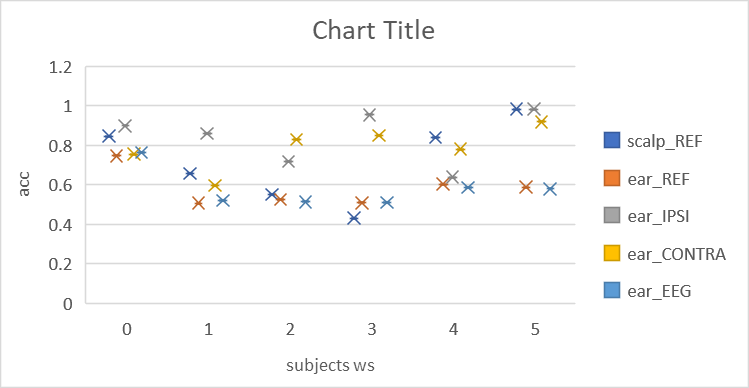

**cross-subject classification**

In [20]:
for key in re_referenced.keys():
    for repeat in range(6):
        # define X train and X test to fit the model
        test_subject = repeat
        train_subjects = [i for i in range(6) if i != test_subject]
        x_train = np.concatenate([re_referenced[key][i] for i in train_subjects], axis=0)
        y_train = OneHotEncoder().fit_transform(np.concatenate([labels[key][i] for i in train_subjects], axis=0).reshape(-1, 1)).toarray()
        x_test = re_referenced[key][test_subject]
        y_test = OneHotEncoder().fit_transform(labels[key][test_subject].reshape(-1, 1)).toarray()

        # create model
        model = create_model(x_train.shape[1:])
        # fit model
        model.fit(x_train, y_train, epochs=150)
        # Test the model on the test set
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
        result['cross_subject'][key].append(accuracy)

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 7s 37ms/step - loss: 1.3603 - accuracy: 0.5148
Epoch 2/150
27/27 [==============================] - 1s 32ms/step - loss: 1.2159 - accuracy: 0.5148
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1491 - accuracy: 0.4792
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.8273 - accuracy: 0.5125
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7199 - accuracy: 0.4982
Epoch 6/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7137 - accuracy: 0.5291
Epoch 7/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7147 - accuracy: 0.4769
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7182 - accuracy: 0.4911
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7116 - accuracy: 0.5089
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7110 - accuracy: 0.4994

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 34ms/step - loss: 1.2531 - accuracy: 0.4919
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 0.9011 - accuracy: 0.4897
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7252 - accuracy: 0.5157
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7200 - accuracy: 0.4962
Epoch 5/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7160 - accuracy: 0.4940
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7136 - accuracy: 0.4713
Epoch 7/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7104 - accuracy: 0.4843
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7113 - accuracy: 0.4648
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7104 - accuracy: 0.4735
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7117 - accuracy: 0.4973

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 33ms/step - loss: 1.3998 - accuracy: 0.4973
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.0270 - accuracy: 0.4865
Epoch 3/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7238 - accuracy: 0.5146
Epoch 4/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7174 - accuracy: 0.4930
Epoch 5/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7095 - accuracy: 0.5102
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7078 - accuracy: 0.5049
Epoch 7/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7118 - accuracy: 0.4617
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7072 - accuracy: 0.5178
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7089 - accuracy: 0.4811
Epoch 10/150
29/29 [==============================] - 1s 33ms/step - loss: 0.7061 - accuracy: 0.4865

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
33/33 [==============================] - 2s 31ms/step - loss: 1.3089 - accuracy: 0.5058
Epoch 2/150
33/33 [==============================] - 1s 31ms/step - loss: 1.0073 - accuracy: 0.4981
Epoch 3/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7249 - accuracy: 0.4971
Epoch 4/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7161 - accuracy: 0.5155
Epoch 5/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7144 - accuracy: 0.4942
Epoch 6/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7099 - accuracy: 0.5097
Epoch 7/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7124 - accuracy: 0.4864
Epoch 8/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7131 - accuracy: 0.4990
Epoch 9/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7141 - accuracy: 0.4796
Epoch 10/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7148 - accuracy: 0.4893

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 32ms/step - loss: 1.3542 - accuracy: 0.5053
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1818 - accuracy: 0.4935
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7857 - accuracy: 0.5077
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7258 - accuracy: 0.4912
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7147 - accuracy: 0.4935
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7137 - accuracy: 0.5053
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7147 - accuracy: 0.4617
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7094 - accuracy: 0.5206
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7106 - accuracy: 0.5124
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7077 - accuracy: 0.5077

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1365 - accuracy: 0.5053
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7467 - accuracy: 0.4852
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7133 - accuracy: 0.4887
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7110 - accuracy: 0.5018
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7165 - accuracy: 0.4935
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7125 - accuracy: 0.4781
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7097 - accuracy: 0.4875
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7092 - accuracy: 0.4935
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7104 - accuracy: 0.4887
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7094 - accuracy: 0.4864

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2969 - accuracy: 0.4923
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 0.9926 - accuracy: 0.5053
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7384 - accuracy: 0.4899
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7138 - accuracy: 0.4970
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7096 - accuracy: 0.5065
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7085 - accuracy: 0.5053
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7086 - accuracy: 0.4970
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7125 - accuracy: 0.4864
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7057 - accuracy: 0.5196
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7092 - accuracy: 0.4816

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3376 - accuracy: 0.5200
Epoch 2/150
29/29 [==============================] - 1s 31ms/step - loss: 1.2208 - accuracy: 0.5233
Epoch 3/150
29/29 [==============================] - 1s 31ms/step - loss: 0.9343 - accuracy: 0.5265
Epoch 4/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7480 - accuracy: 0.4865
Epoch 5/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7122 - accuracy: 0.5027
Epoch 6/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7065 - accuracy: 0.5276
Epoch 7/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7166 - accuracy: 0.4735
Epoch 8/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7103 - accuracy: 0.4962
Epoch 9/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7133 - accuracy: 0.5005
Epoch 10/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7087 - accuracy: 0.5027

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3524 - accuracy: 0.4995
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.1699 - accuracy: 0.5049
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 0.9739 - accuracy: 0.4973
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7434 - accuracy: 0.4779
Epoch 5/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7162 - accuracy: 0.4887
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7127 - accuracy: 0.4800
Epoch 7/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7105 - accuracy: 0.4714
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7099 - accuracy: 0.4984
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7117 - accuracy: 0.4682
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7097 - accuracy: 0.4930

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
33/33 [==============================] - 2s 31ms/step - loss: 1.4186 - accuracy: 0.4903
Epoch 2/150
33/33 [==============================] - 1s 31ms/step - loss: 1.2655 - accuracy: 0.4922
Epoch 3/150
33/33 [==============================] - 1s 31ms/step - loss: 1.1622 - accuracy: 0.4942
Epoch 4/150
33/33 [==============================] - 1s 31ms/step - loss: 1.1394 - accuracy: 0.5000
Epoch 5/150
33/33 [==============================] - 1s 31ms/step - loss: 0.9183 - accuracy: 0.5204
Epoch 6/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7311 - accuracy: 0.4961
Epoch 7/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7152 - accuracy: 0.4874
Epoch 8/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7127 - accuracy: 0.4981
Epoch 9/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7118 - accuracy: 0.5078
Epoch 10/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7167 - accuracy: 0.4767

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.4536 - accuracy: 0.4806
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2924 - accuracy: 0.4664
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2199 - accuracy: 0.4923
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2373 - accuracy: 0.4971
Epoch 5/150
27/27 [==============================] - 1s 30ms/step - loss: 1.1701 - accuracy: 0.4817
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.8463 - accuracy: 0.5135
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7249 - accuracy: 0.4747
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7166 - accuracy: 0.4806
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7165 - accuracy: 0.4841
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7138 - accuracy: 0.5029

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.4620 - accuracy: 0.5113
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3923 - accuracy: 0.4875
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3254 - accuracy: 0.4994
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1289 - accuracy: 0.5243
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2167 - accuracy: 0.4686
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1124 - accuracy: 0.4994
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.9078 - accuracy: 0.5125
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7446 - accuracy: 0.4958
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7296 - accuracy: 0.4769
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7222 - accuracy: 0.4745

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 34ms/step - loss: 0.7310 - accuracy: 0.5053
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7125 - accuracy: 0.5077
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7034 - accuracy: 0.5047
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7073 - accuracy: 0.5083
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6986 - accuracy: 0.5350
Epoch 6/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6883 - accuracy: 0.5516
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6707 - accuracy: 0.6074
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6203 - accuracy: 0.6773
Epoch 9/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5079 - accuracy: 0.7592
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4155 - accuracy: 0.8244

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7257 - accuracy: 0.4951
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7010 - accuracy: 0.5553
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6888 - accuracy: 0.5748
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6812 - accuracy: 0.5758
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6413 - accuracy: 0.6506
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5281 - accuracy: 0.7568
Epoch 7/150
58/58 [==============================] - 2s 31ms/step - loss: 0.4580 - accuracy: 0.8256
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4012 - accuracy: 0.8494
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3386 - accuracy: 0.8852
Epoch 10/150
58/58 [==============================] - 2s 31ms/step - loss: 0.3581 - accuracy: 0.8711

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7111 - accuracy: 0.5237
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6810 - accuracy: 0.5917
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6240 - accuracy: 0.6726
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4572 - accuracy: 0.7983
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3522 - accuracy: 0.8522
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3286 - accuracy: 0.8619
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3039 - accuracy: 0.8803
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2771 - accuracy: 0.8954
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2736 - accuracy: 0.8873
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2562 - accuracy: 0.9013

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
65/65 [==============================] - 3s 33ms/step - loss: 0.7216 - accuracy: 0.5141
Epoch 2/150
65/65 [==============================] - 2s 32ms/step - loss: 0.7147 - accuracy: 0.5073
Epoch 3/150
65/65 [==============================] - 2s 31ms/step - loss: 0.6916 - accuracy: 0.5718
Epoch 4/150
65/65 [==============================] - 2s 31ms/step - loss: 0.6205 - accuracy: 0.6752
Epoch 5/150
65/65 [==============================] - 2s 31ms/step - loss: 0.4838 - accuracy: 0.7748
Epoch 6/150
65/65 [==============================] - 2s 31ms/step - loss: 0.4470 - accuracy: 0.8053
Epoch 7/150
65/65 [==============================] - 2s 31ms/step - loss: 0.4078 - accuracy: 0.8233
Epoch 8/150
65/65 [==============================] - 2s 31ms/step - loss: 0.4170 - accuracy: 0.8194
Epoch 9/150
65/65 [==============================] - 2s 31ms/step - loss: 0.4073 - accuracy: 0.8252
Epoch 10/150
65/65 [==============================] - 2s 32ms/step - loss: 0.4044 - accuracy: 0.8316

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
54/54 [==============================] - 2s 32ms/step - loss: 0.7326 - accuracy: 0.5012
Epoch 2/150
54/54 [==============================] - 2s 32ms/step - loss: 0.7091 - accuracy: 0.5377
Epoch 3/150
54/54 [==============================] - 2s 32ms/step - loss: 0.6900 - accuracy: 0.5754
Epoch 4/150
54/54 [==============================] - 2s 32ms/step - loss: 0.6728 - accuracy: 0.5866
Epoch 5/150
54/54 [==============================] - 2s 32ms/step - loss: 0.6427 - accuracy: 0.6413
Epoch 6/150
54/54 [==============================] - 2s 32ms/step - loss: 0.5649 - accuracy: 0.7314
Epoch 7/150
54/54 [==============================] - 2s 32ms/step - loss: 0.4968 - accuracy: 0.7809
Epoch 8/150
54/54 [==============================] - 2s 32ms/step - loss: 0.4694 - accuracy: 0.8174
Epoch 9/150
54/54 [==============================] - 2s 32ms/step - loss: 0.4095 - accuracy: 0.8357
Epoch 10/150
54/54 [==============================] - 2s 32ms/step - loss: 0.3934 - accuracy: 0.8322

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 31ms/step - loss: 0.7216 - accuracy: 0.4875
Epoch 2/150
53/53 [==============================] - 2s 31ms/step - loss: 0.7144 - accuracy: 0.5047
Epoch 3/150
53/53 [==============================] - 2s 31ms/step - loss: 0.7041 - accuracy: 0.5089
Epoch 4/150
53/53 [==============================] - 2s 31ms/step - loss: 0.7010 - accuracy: 0.5006
Epoch 5/150
53/53 [==============================] - 2s 31ms/step - loss: 0.6993 - accuracy: 0.5391
Epoch 6/150
53/53 [==============================] - 2s 31ms/step - loss: 0.6839 - accuracy: 0.5641
Epoch 7/150
53/53 [==============================] - 2s 31ms/step - loss: 0.6762 - accuracy: 0.6115
Epoch 8/150
53/53 [==============================] - 2s 31ms/step - loss: 0.6274 - accuracy: 0.6590
Epoch 9/150
53/53 [==============================] - 2s 31ms/step - loss: 0.5226 - accuracy: 0.7568
Epoch 10/150
53/53 [==============================] - 2s 31ms/step - loss: 0.4189 - accuracy: 0.8167

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 33ms/step - loss: 0.7093 - accuracy: 0.5528
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6607 - accuracy: 0.6441
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6508 - accuracy: 0.6530
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6375 - accuracy: 0.6607
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6164 - accuracy: 0.6767
Epoch 6/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6173 - accuracy: 0.6779
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6079 - accuracy: 0.6987
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6001 - accuracy: 0.6987
Epoch 9/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5904 - accuracy: 0.7028
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5821 - accuracy: 0.7189

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7267 - accuracy: 0.5287
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6826 - accuracy: 0.6230
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6187 - accuracy: 0.6966
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5784 - accuracy: 0.7248
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5716 - accuracy: 0.7438
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5235 - accuracy: 0.7644
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4723 - accuracy: 0.8039
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4028 - accuracy: 0.8369
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3605 - accuracy: 0.8651
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3338 - accuracy: 0.8678

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6790 - accuracy: 0.5895
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5842 - accuracy: 0.7082
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5281 - accuracy: 0.7465
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4402 - accuracy: 0.7999
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3529 - accuracy: 0.8474
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3327 - accuracy: 0.8630
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2798 - accuracy: 0.8781
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2532 - accuracy: 0.9040
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2685 - accuracy: 0.8932
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2616 - accuracy: 0.8932

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
65/65 [==============================] - 3s 32ms/step - loss: 0.7404 - accuracy: 0.4995
Epoch 2/150
65/65 [==============================] - 2s 32ms/step - loss: 0.6807 - accuracy: 0.6383
Epoch 3/150
65/65 [==============================] - 2s 31ms/step - loss: 0.6080 - accuracy: 0.6990
Epoch 4/150
65/65 [==============================] - 2s 32ms/step - loss: 0.5930 - accuracy: 0.7189
Epoch 5/150
65/65 [==============================] - 2s 32ms/step - loss: 0.5722 - accuracy: 0.7204
Epoch 6/150
65/65 [==============================] - 2s 31ms/step - loss: 0.5594 - accuracy: 0.7393
Epoch 7/150
65/65 [==============================] - 2s 31ms/step - loss: 0.5510 - accuracy: 0.7340
Epoch 8/150
65/65 [==============================] - 2s 31ms/step - loss: 0.5401 - accuracy: 0.7262
Epoch 9/150
65/65 [==============================] - 2s 32ms/step - loss: 0.5245 - accuracy: 0.7646
Epoch 10/150
65/65 [==============================] - 2s 32ms/step - loss: 0.4641 - accuracy: 0.7879

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
54/54 [==============================] - 2s 31ms/step - loss: 0.7407 - accuracy: 0.5118
Epoch 2/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6982 - accuracy: 0.5554
Epoch 3/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6621 - accuracy: 0.6431
Epoch 4/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6491 - accuracy: 0.6614
Epoch 5/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6281 - accuracy: 0.6755
Epoch 6/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6247 - accuracy: 0.6832
Epoch 7/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6051 - accuracy: 0.6914
Epoch 8/150
54/54 [==============================] - 2s 32ms/step - loss: 0.5811 - accuracy: 0.7144
Epoch 9/150
54/54 [==============================] - 2s 31ms/step - loss: 0.5694 - accuracy: 0.7261
Epoch 10/150
54/54 [==============================] - 2s 31ms/step - loss: 0.5572 - accuracy: 0.7373

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7058 - accuracy: 0.5647
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6540 - accuracy: 0.6862
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5919 - accuracy: 0.7295
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5707 - accuracy: 0.7479
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5162 - accuracy: 0.7681
Epoch 6/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4625 - accuracy: 0.8132
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.3594 - accuracy: 0.8695
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4122 - accuracy: 0.8227
Epoch 9/150
53/53 [==============================] - 2s 32ms/step - loss: 0.3495 - accuracy: 0.8719
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.3164 - accuracy: 0.8749

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 2s 34ms/step - loss: 1.4529 - accuracy: 0.4733
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.5247 - accuracy: 0.4828
Epoch 3/150
27/27 [==============================] - 1s 30ms/step - loss: 1.2412 - accuracy: 0.5148
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2820 - accuracy: 0.5101
Epoch 5/150
27/27 [==============================] - 1s 30ms/step - loss: 1.2702 - accuracy: 0.5042
Epoch 6/150
27/27 [==============================] - 1s 30ms/step - loss: 1.1716 - accuracy: 0.4721
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 1.0731 - accuracy: 0.5030
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.8043 - accuracy: 0.4899
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7428 - accuracy: 0.5018
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7140 - accuracy: 0.4887

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.4182 - accuracy: 0.5016
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.1045 - accuracy: 0.4626
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7689 - accuracy: 0.4962
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7212 - accuracy: 0.4865
Epoch 5/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7071 - accuracy: 0.5298
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7092 - accuracy: 0.4908
Epoch 7/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7100 - accuracy: 0.4962
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7052 - accuracy: 0.5060
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7103 - accuracy: 0.4886
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7089 - accuracy: 0.4908

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.5350 - accuracy: 0.4865
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.0500 - accuracy: 0.4930
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7289 - accuracy: 0.4908
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7121 - accuracy: 0.4919
Epoch 5/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7094 - accuracy: 0.5070
Epoch 6/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7085 - accuracy: 0.5092
Epoch 7/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7074 - accuracy: 0.5059
Epoch 8/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7088 - accuracy: 0.5070
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7095 - accuracy: 0.5167
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7099 - accuracy: 0.4876

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
33/33 [==============================] - 2s 31ms/step - loss: 1.4500 - accuracy: 0.4893
Epoch 2/150
33/33 [==============================] - 1s 31ms/step - loss: 1.2961 - accuracy: 0.4816
Epoch 3/150
33/33 [==============================] - 1s 31ms/step - loss: 1.2802 - accuracy: 0.4961
Epoch 4/150
33/33 [==============================] - 1s 31ms/step - loss: 1.1514 - accuracy: 0.5000
Epoch 5/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7989 - accuracy: 0.4913
Epoch 6/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7226 - accuracy: 0.4971
Epoch 7/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 8/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7086 - accuracy: 0.5049
Epoch 9/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7096 - accuracy: 0.4883
Epoch 10/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7154 - accuracy: 0.5049

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3767 - accuracy: 0.5171
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2813 - accuracy: 0.4723
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.0122 - accuracy: 0.4912
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7358 - accuracy: 0.5124
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7214 - accuracy: 0.5006
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7149 - accuracy: 0.5077
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7120 - accuracy: 0.4888
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7200 - accuracy: 0.4829
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7110 - accuracy: 0.5053
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7113 - accuracy: 0.5018

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.4826 - accuracy: 0.4875
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.5220 - accuracy: 0.4816
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3500 - accuracy: 0.5136
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 1.0362 - accuracy: 0.4994
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7932 - accuracy: 0.5006
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7228 - accuracy: 0.4650
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7137 - accuracy: 0.5279
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7223 - accuracy: 0.4852
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7144 - accuracy: 0.5018
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7141 - accuracy: 0.5136

In [21]:
cs_result = pd.DataFrame(result['cross_subject']).T

In [22]:
for key in result['cross_subject'].keys():
    result['cross_subject'][key].append(np.mean(result['cross_subject'][key]))

In [23]:
cs_result.rename(columns={6:'Average'}, inplace=True)

In [24]:
cs_result

,0,1,2,3,4,5
scalp_REF,0.500000,0.66875,0.551282,0.490566,0.820513,0.629167
ear_REF,0.500000,0.63750,0.500000,0.509434,0.688034,0.495833
ear_IPSI,0.527083,0.56250,0.471154,0.632075,0.512821,0.631250
ear_CONTRA,0.627083,0.50000,0.650641,0.556604,0.918803,0.500000
ear_EEG,0.841667,0.73750,0.589744,0.490566,0.807692,0.491667


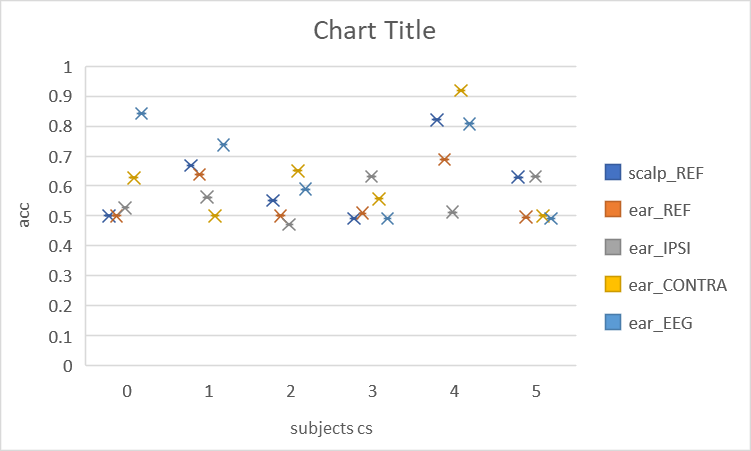

**individual subject retraining**

In [20]:
for key in re_referenced.keys():
    for repeat in range(6):
        # define X train and X test to fit the model
        test_subject = repeat
        train_subjects = [i for i in range(6) if i != test_subject]
        x_train = np.concatenate([re_referenced[key][i] for i in train_subjects], axis=0)
        y_train = OneHotEncoder().fit_transform(np.concatenate([labels[key][i] for i in train_subjects], axis=0).reshape(-1, 1)).toarray()
        y_test = OneHotEncoder().fit_transform(labels[key][test_subject].reshape(-1, 1)).toarray()
        x_retrain_train, x_retrain_test, y_retrain_train, y_retrain_test = train_test_split(re_referenced[key][test_subject], y_test, test_size=0.2)

        # create model
        model = create_model(x_train.shape[1:])
        # fit model
        model.fit(x_train, y_train, epochs=150)
        # Retrain on the test subject's data
        model.fit(x_retrain_train, y_retrain_train, epochs=70, verbose=0)
        # Test the model on the test set
        y_pred = model.predict(x_retrain_test)
        accuracy = accuracy_score(np.argmax(y_retrain_test, axis=1), np.argmax(y_pred, axis=1))
        result['individual_subject'][key].append(accuracy)

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 7s 36ms/step - loss: 1.3846 - accuracy: 0.4757
Epoch 2/150
27/27 [==============================] - 1s 33ms/step - loss: 1.1043 - accuracy: 0.5077
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 0.9392 - accuracy: 0.5065
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7291 - accuracy: 0.5006
Epoch 5/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7115 - accuracy: 0.5113
Epoch 6/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7169 - accuracy: 0.4970
Epoch 7/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7119 - accuracy: 0.4899
Epoch 8/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7102 - accuracy: 0.5006
Epoch 9/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7152 - accuracy: 0.4899
Epoch 10/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7071 - accuracy: 0.5267

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 2s 34ms/step - loss: 1.3754 - accuracy: 0.5027
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3093 - accuracy: 0.4973
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 1.2298 - accuracy: 0.5114
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.9729 - accuracy: 0.5081
Epoch 5/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7205 - accuracy: 0.5081
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7147 - accuracy: 0.4984
Epoch 7/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7118 - accuracy: 0.4930
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7108 - accuracy: 0.5125
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7113 - accuracy: 0.4930
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7090 - accuracy: 0.4984

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 33ms/step - loss: 1.3003 - accuracy: 0.4919
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 0.9199 - accuracy: 0.4768
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7160 - accuracy: 0.5113
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7122 - accuracy: 0.4887
Epoch 5/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7137 - accuracy: 0.4951
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7048 - accuracy: 0.5135
Epoch 7/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7074 - accuracy: 0.5049
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7081 - accuracy: 0.4844
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7074 - accuracy: 0.4757
Epoch 10/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7064 - accuracy: 0.4854

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
33/33 [==============================] - 2s 32ms/step - loss: 1.5116 - accuracy: 0.4990
Epoch 2/150
33/33 [==============================] - 1s 32ms/step - loss: 1.2879 - accuracy: 0.5252
Epoch 3/150
33/33 [==============================] - 1s 32ms/step - loss: 1.0634 - accuracy: 0.5136
Epoch 4/150
33/33 [==============================] - 1s 32ms/step - loss: 0.7464 - accuracy: 0.5194
Epoch 5/150
33/33 [==============================] - 1s 32ms/step - loss: 0.7231 - accuracy: 0.4932
Epoch 6/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7154 - accuracy: 0.4971
Epoch 7/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7130 - accuracy: 0.5039
Epoch 8/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7160 - accuracy: 0.5019
Epoch 9/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7197 - accuracy: 0.4757
Epoch 10/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7131 - accuracy: 0.5019

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 32ms/step - loss: 1.4158 - accuracy: 0.4971
Epoch 2/150
27/27 [==============================] - 1s 32ms/step - loss: 1.0084 - accuracy: 0.5241
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7946 - accuracy: 0.4888
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7177 - accuracy: 0.4923
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7173 - accuracy: 0.4947
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7066 - accuracy: 0.5383
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7058 - accuracy: 0.5371
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7118 - accuracy: 0.4900
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7101 - accuracy: 0.4971
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7059 - accuracy: 0.5241

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 32ms/step - loss: 1.3875 - accuracy: 0.4970
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3053 - accuracy: 0.4982
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2791 - accuracy: 0.4994
Epoch 4/150
27/27 [==============================] - 1s 32ms/step - loss: 1.1204 - accuracy: 0.5006
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7646 - accuracy: 0.5053
Epoch 6/150
27/27 [==============================] - 1s 33ms/step - loss: 0.7154 - accuracy: 0.5208
Epoch 7/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7246 - accuracy: 0.4686
Epoch 8/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7197 - accuracy: 0.5136
Epoch 9/150
27/27 [==============================] - 1s 33ms/step - loss: 0.7132 - accuracy: 0.5018
Epoch 10/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7149 - accuracy: 0.5172

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2303 - accuracy: 0.4852
Epoch 2/150
27/27 [==============================] - 1s 33ms/step - loss: 0.9067 - accuracy: 0.4923
Epoch 3/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7201 - accuracy: 0.5006
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7112 - accuracy: 0.4958
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7122 - accuracy: 0.5196
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7061 - accuracy: 0.5160
Epoch 7/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7087 - accuracy: 0.5172
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7130 - accuracy: 0.5219
Epoch 9/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7078 - accuracy: 0.5053
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7122 - accuracy: 0.4733

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 31ms/step - loss: 1.2320 - accuracy: 0.5190
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 0.8922 - accuracy: 0.4529
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7211 - accuracy: 0.4724
Epoch 4/150
29/29 [==============================] - 1s 33ms/step - loss: 0.7134 - accuracy: 0.5027
Epoch 5/150
29/29 [==============================] - 1s 33ms/step - loss: 0.7102 - accuracy: 0.5233
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7183 - accuracy: 0.4875
Epoch 7/150
29/29 [==============================] - 1s 33ms/step - loss: 0.7142 - accuracy: 0.5070
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7214 - accuracy: 0.4875
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7155 - accuracy: 0.5222
Epoch 10/150
29/29 [==============================] - 1s 33ms/step - loss: 0.7158 - accuracy: 0.4572

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.4494 - accuracy: 0.4919
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.2403 - accuracy: 0.4887
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 1.0342 - accuracy: 0.4973
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7640 - accuracy: 0.4768
Epoch 5/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7183 - accuracy: 0.4671
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7149 - accuracy: 0.5092
Epoch 7/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7112 - accuracy: 0.5027
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7096 - accuracy: 0.5113
Epoch 9/150
29/29 [==============================] - 1s 33ms/step - loss: 0.7110 - accuracy: 0.5264
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7094 - accuracy: 0.5049

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
33/33 [==============================] - 2s 32ms/step - loss: 1.3001 - accuracy: 0.5126
Epoch 2/150
33/33 [==============================] - 1s 31ms/step - loss: 1.2319 - accuracy: 0.4981
Epoch 3/150
33/33 [==============================] - 1s 30ms/step - loss: 1.0090 - accuracy: 0.5078
Epoch 4/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7531 - accuracy: 0.4942
Epoch 5/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7171 - accuracy: 0.4951
Epoch 6/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7117 - accuracy: 0.4903
Epoch 7/150
33/33 [==============================] - 1s 32ms/step - loss: 0.7090 - accuracy: 0.5097
Epoch 8/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7076 - accuracy: 0.5136
Epoch 9/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7055 - accuracy: 0.5165
Epoch 10/150
33/33 [==============================] - 1s 32ms/step - loss: 0.7069 - accuracy: 0.5272

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 33ms/step - loss: 1.3792 - accuracy: 0.4829
Epoch 2/150
27/27 [==============================] - 1s 32ms/step - loss: 1.3885 - accuracy: 0.5100
Epoch 3/150
27/27 [==============================] - 1s 32ms/step - loss: 1.3242 - accuracy: 0.4865
Epoch 4/150
27/27 [==============================] - 1s 32ms/step - loss: 1.3283 - accuracy: 0.4629
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1183 - accuracy: 0.4865
Epoch 6/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7710 - accuracy: 0.4865
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7171 - accuracy: 0.5147
Epoch 8/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7171 - accuracy: 0.4971
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7182 - accuracy: 0.4664
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7140 - accuracy: 0.5253

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3813 - accuracy: 0.5125
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.3112 - accuracy: 0.4650
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.0966 - accuracy: 0.4982
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.8129 - accuracy: 0.4852
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7192 - accuracy: 0.4994
Epoch 6/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7138 - accuracy: 0.4899
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7110 - accuracy: 0.5267
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7110 - accuracy: 0.5065
Epoch 9/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7136 - accuracy: 0.5113
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7108 - accuracy: 0.4828

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 33ms/step - loss: 0.7238 - accuracy: 0.4988
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7043 - accuracy: 0.5237
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7008 - accuracy: 0.5237
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6832 - accuracy: 0.5854
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6749 - accuracy: 0.6044
Epoch 6/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6115 - accuracy: 0.6803
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5324 - accuracy: 0.7681
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4644 - accuracy: 0.8055
Epoch 9/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4197 - accuracy: 0.8256
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4184 - accuracy: 0.8280

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7349 - accuracy: 0.4892
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7106 - accuracy: 0.5016
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7128 - accuracy: 0.5016
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6995 - accuracy: 0.5466
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6974 - accuracy: 0.5455
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6693 - accuracy: 0.6154
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5734 - accuracy: 0.7308
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4850 - accuracy: 0.7985
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4318 - accuracy: 0.8304
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3932 - accuracy: 0.8234

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7087 - accuracy: 0.5205
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6942 - accuracy: 0.5615
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6792 - accuracy: 0.5825
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6595 - accuracy: 0.6052
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5456 - accuracy: 0.7163
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4169 - accuracy: 0.8112
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3756 - accuracy: 0.8398
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3375 - accuracy: 0.8598
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3260 - accuracy: 0.8592
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3323 - accuracy: 0.8603

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
65/65 [==============================] - 3s 32ms/step - loss: 0.7286 - accuracy: 0.5010
Epoch 2/150
65/65 [==============================] - 2s 31ms/step - loss: 0.7080 - accuracy: 0.5146
Epoch 3/150
65/65 [==============================] - 2s 32ms/step - loss: 0.6951 - accuracy: 0.5660
Epoch 4/150
65/65 [==============================] - 2s 32ms/step - loss: 0.6026 - accuracy: 0.7083
Epoch 5/150
65/65 [==============================] - 2s 32ms/step - loss: 0.4351 - accuracy: 0.8184
Epoch 6/150
65/65 [==============================] - 2s 32ms/step - loss: 0.3819 - accuracy: 0.8524
Epoch 7/150
65/65 [==============================] - 2s 31ms/step - loss: 0.3741 - accuracy: 0.8510
Epoch 8/150
65/65 [==============================] - 2s 31ms/step - loss: 0.3796 - accuracy: 0.8388
Epoch 9/150
65/65 [==============================] - 2s 32ms/step - loss: 0.3508 - accuracy: 0.8500
Epoch 10/150
65/65 [==============================] - 2s 32ms/step - loss: 0.3235 - accuracy: 0.8743

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
54/54 [==============================] - 2s 32ms/step - loss: 0.7301 - accuracy: 0.5324
Epoch 2/150
54/54 [==============================] - 2s 31ms/step - loss: 0.7107 - accuracy: 0.5253
Epoch 3/150
54/54 [==============================] - 2s 31ms/step - loss: 0.7126 - accuracy: 0.5253
Epoch 4/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6966 - accuracy: 0.5442
Epoch 5/150
54/54 [==============================] - 2s 31ms/step - loss: 0.7014 - accuracy: 0.5777
Epoch 6/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6760 - accuracy: 0.5848
Epoch 7/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6741 - accuracy: 0.5978
Epoch 8/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6630 - accuracy: 0.6148
Epoch 9/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6613 - accuracy: 0.6037
Epoch 10/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6439 - accuracy: 0.6313

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 33ms/step - loss: 0.7230 - accuracy: 0.5249
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7009 - accuracy: 0.5469
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6883 - accuracy: 0.5902
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6632 - accuracy: 0.6246
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6029 - accuracy: 0.7112
Epoch 6/150
53/53 [==============================] - 2s 31ms/step - loss: 0.5156 - accuracy: 0.7622
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4525 - accuracy: 0.8025
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4368 - accuracy: 0.8055
Epoch 9/150
53/53 [==============================] - 2s 31ms/step - loss: 0.6500 - accuracy: 0.6287
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4559 - accuracy: 0.7835

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7394 - accuracy: 0.4887
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7005 - accuracy: 0.5807
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6861 - accuracy: 0.5789
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6572 - accuracy: 0.6370
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6392 - accuracy: 0.6471
Epoch 6/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6291 - accuracy: 0.6767
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6296 - accuracy: 0.6607
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6187 - accuracy: 0.6767
Epoch 9/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6108 - accuracy: 0.6874
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6095 - accuracy: 0.6916

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 32ms/step - loss: 0.7211 - accuracy: 0.5525
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6734 - accuracy: 0.6360
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6336 - accuracy: 0.6744
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6015 - accuracy: 0.7124
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5856 - accuracy: 0.7291
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.5188 - accuracy: 0.7887
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4582 - accuracy: 0.8380
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3600 - accuracy: 0.8537
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3404 - accuracy: 0.8667
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3213 - accuracy: 0.8722

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
58/58 [==============================] - 2s 33ms/step - loss: 0.7071 - accuracy: 0.5205
Epoch 2/150
58/58 [==============================] - 2s 32ms/step - loss: 0.6232 - accuracy: 0.6661
Epoch 3/150
58/58 [==============================] - 2s 32ms/step - loss: 0.4985 - accuracy: 0.7665
Epoch 4/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3690 - accuracy: 0.8447
Epoch 5/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3130 - accuracy: 0.8824
Epoch 6/150
58/58 [==============================] - 2s 32ms/step - loss: 0.3070 - accuracy: 0.8808
Epoch 7/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2864 - accuracy: 0.8873
Epoch 8/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2720 - accuracy: 0.8889
Epoch 9/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2947 - accuracy: 0.8830
Epoch 10/150
58/58 [==============================] - 2s 32ms/step - loss: 0.2598 - accuracy: 0.8883

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
65/65 [==============================] - 3s 32ms/step - loss: 0.7078 - accuracy: 0.5495
Epoch 2/150
65/65 [==============================] - 2s 32ms/step - loss: 0.6645 - accuracy: 0.6568
Epoch 3/150
65/65 [==============================] - 2s 32ms/step - loss: 0.6110 - accuracy: 0.7107
Epoch 4/150
65/65 [==============================] - 2s 32ms/step - loss: 0.5832 - accuracy: 0.7257
Epoch 5/150
65/65 [==============================] - 2s 32ms/step - loss: 0.5663 - accuracy: 0.7335
Epoch 6/150
65/65 [==============================] - 2s 32ms/step - loss: 0.5233 - accuracy: 0.7505
Epoch 7/150
65/65 [==============================] - 2s 32ms/step - loss: 0.4318 - accuracy: 0.8024
Epoch 8/150
65/65 [==============================] - 2s 32ms/step - loss: 0.3875 - accuracy: 0.8437
Epoch 9/150
65/65 [==============================] - 2s 32ms/step - loss: 0.3583 - accuracy: 0.8699
Epoch 10/150
65/65 [==============================] - 2s 32ms/step - loss: 0.3082 - accuracy: 0.8723

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
54/54 [==============================] - 2s 31ms/step - loss: 0.7268 - accuracy: 0.5106
Epoch 2/150
54/54 [==============================] - 2s 32ms/step - loss: 0.6916 - accuracy: 0.5972
Epoch 3/150
54/54 [==============================] - 2s 31ms/step - loss: 0.6465 - accuracy: 0.6302
Epoch 4/150
54/54 [==============================] - 2s 32ms/step - loss: 0.6054 - accuracy: 0.6902
Epoch 5/150
54/54 [==============================] - 2s 32ms/step - loss: 0.5527 - accuracy: 0.7232
Epoch 6/150
54/54 [==============================] - 2s 31ms/step - loss: 0.4791 - accuracy: 0.7903
Epoch 7/150
54/54 [==============================] - 2s 31ms/step - loss: 0.4327 - accuracy: 0.8062
Epoch 8/150
54/54 [==============================] - 2s 31ms/step - loss: 0.4161 - accuracy: 0.8322
Epoch 9/150
54/54 [==============================] - 2s 31ms/step - loss: 0.4017 - accuracy: 0.8504
Epoch 10/150
54/54 [==============================] - 2s 31ms/step - loss: 0.3856 - accuracy: 0.8380

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
53/53 [==============================] - 2s 32ms/step - loss: 0.7181 - accuracy: 0.5801
Epoch 2/150
53/53 [==============================] - 2s 32ms/step - loss: 0.6417 - accuracy: 0.6999
Epoch 3/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5774 - accuracy: 0.7361
Epoch 4/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5292 - accuracy: 0.7740
Epoch 5/150
53/53 [==============================] - 2s 32ms/step - loss: 0.5157 - accuracy: 0.7663
Epoch 6/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4867 - accuracy: 0.8066
Epoch 7/150
53/53 [==============================] - 2s 32ms/step - loss: 0.4369 - accuracy: 0.8381
Epoch 8/150
53/53 [==============================] - 2s 32ms/step - loss: 0.3518 - accuracy: 0.8689
Epoch 9/150
53/53 [==============================] - 2s 32ms/step - loss: 0.3188 - accuracy: 0.8891
Epoch 10/150
53/53 [==============================] - 2s 32ms/step - loss: 0.3081 - accuracy: 0.8909

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 2s 34ms/step - loss: 1.3557 - accuracy: 0.4864
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.0457 - accuracy: 0.4887
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7438 - accuracy: 0.4840
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7142 - accuracy: 0.5030
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7146 - accuracy: 0.5030
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7125 - accuracy: 0.4852
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7144 - accuracy: 0.5006
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7099 - accuracy: 0.5314
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7097 - accuracy: 0.5101
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7128 - accuracy: 0.4757

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3607 - accuracy: 0.4843
Epoch 2/150
29/29 [==============================] - 1s 31ms/step - loss: 1.1893 - accuracy: 0.4886
Epoch 3/150
29/29 [==============================] - 1s 31ms/step - loss: 0.8971 - accuracy: 0.5049
Epoch 4/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7269 - accuracy: 0.4984
Epoch 5/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7211 - accuracy: 0.4865
Epoch 6/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7123 - accuracy: 0.5211
Epoch 7/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7133 - accuracy: 0.5081
Epoch 8/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7131 - accuracy: 0.4778
Epoch 9/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7131 - accuracy: 0.5027
Epoch 10/150
29/29 [==============================] - 1s 31ms/step - loss: 0.7170 - accuracy: 0.4886

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3922 - accuracy: 0.5221
Epoch 2/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3706 - accuracy: 0.4951
Epoch 3/150
29/29 [==============================] - 1s 32ms/step - loss: 1.3057 - accuracy: 0.5146
Epoch 4/150
29/29 [==============================] - 1s 32ms/step - loss: 1.1641 - accuracy: 0.4962
Epoch 5/150
29/29 [==============================] - 1s 32ms/step - loss: 0.8625 - accuracy: 0.4919
Epoch 6/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7313 - accuracy: 0.4833
Epoch 7/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7188 - accuracy: 0.5113
Epoch 8/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7147 - accuracy: 0.4876
Epoch 9/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7181 - accuracy: 0.4908
Epoch 10/150
29/29 [==============================] - 1s 32ms/step - loss: 0.7159 - accuracy: 0.4984

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
33/33 [==============================] - 2s 31ms/step - loss: 1.2559 - accuracy: 0.4932
Epoch 2/150
33/33 [==============================] - 1s 31ms/step - loss: 0.9911 - accuracy: 0.4748
Epoch 3/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7371 - accuracy: 0.5165
Epoch 4/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7217 - accuracy: 0.4718
Epoch 5/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7140 - accuracy: 0.4767
Epoch 6/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7137 - accuracy: 0.4835
Epoch 7/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7096 - accuracy: 0.5029
Epoch 8/150
33/33 [==============================] - 1s 32ms/step - loss: 0.7134 - accuracy: 0.4699
Epoch 9/150
33/33 [==============================] - 1s 32ms/step - loss: 0.7101 - accuracy: 0.5107
Epoch 10/150
33/33 [==============================] - 1s 31ms/step - loss: 0.7083 - accuracy: 0.4942

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.1911 - accuracy: 0.4841
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 0.8133 - accuracy: 0.5053
Epoch 3/150
27/27 [==============================] - 1s 32ms/step - loss: 0.7271 - accuracy: 0.4617
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7151 - accuracy: 0.5147
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7138 - accuracy: 0.5053
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7113 - accuracy: 0.4947
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7114 - accuracy: 0.5194
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7182 - accuracy: 0.4959
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7139 - accuracy: 0.5065
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7145 - accuracy: 0.4794

C:\Users\DFMRendering\Desktop\python\env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/150
27/27 [==============================] - 1s 31ms/step - loss: 1.6515 - accuracy: 0.4816
Epoch 2/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2796 - accuracy: 0.5125
Epoch 3/150
27/27 [==============================] - 1s 31ms/step - loss: 1.4219 - accuracy: 0.4721
Epoch 4/150
27/27 [==============================] - 1s 31ms/step - loss: 1.2794 - accuracy: 0.5148
Epoch 5/150
27/27 [==============================] - 1s 31ms/step - loss: 1.0195 - accuracy: 0.5077
Epoch 6/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7233 - accuracy: 0.5065
Epoch 7/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7164 - accuracy: 0.5184
Epoch 8/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7195 - accuracy: 0.5030
Epoch 9/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7147 - accuracy: 0.5030
Epoch 10/150
27/27 [==============================] - 1s 31ms/step - loss: 0.7194 - accuracy: 0.4994

In [28]:
is_result = pd.DataFrame(result['individual_subject']).T

In [22]:
for key in result['individual_subject'].keys():
    result['individual_subject'][key].append(np.mean(result['individual_subject'][key]))

In [29]:
is_result.rename(columns={6:'Average'}, inplace=True)

In [30]:
is_result

,0,1,2,3,4,5,Average
scalp_REF,0.520833,0.843750,0.562500,0.454545,0.574468,1.000000,0.659349
ear_REF,0.833333,0.687500,0.406250,0.727273,0.808511,0.437500,0.650061
ear_IPSI,0.583333,0.968750,0.539683,0.772727,0.989362,1.000000,0.808976
ear_CONTRA,0.979167,0.796875,0.841270,0.454545,0.946809,1.000000,0.836444
ear_EEG,0.479167,0.531250,0.906250,0.363636,0.829787,0.979167,0.681543


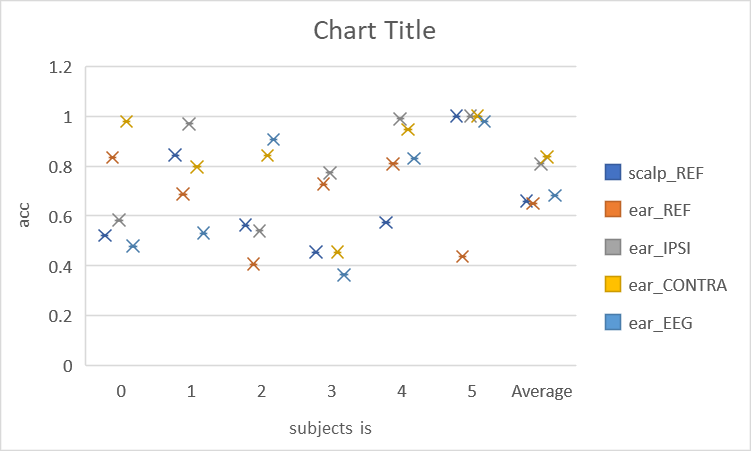